<a href="https://colab.research.google.com/github/noviaptr/Assignment_StartupCampus/blob/main/Colab_Final_Project_Team_Apollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# **Churn Prediction**
> Team Apollo
---





---
# Business Problem
>
---
1. Perusahaan menargetkan pertumbuhan pengguna.
2. Fokus pada peningkatan retensi pelanggan melalui pemberian kode promo dan pertumbuhan pendapatan.




---
# Goals
>
---
1.	Peningkatan Pendapatan : Meningkatkan pendapatan secara signifikan.
2.	Efisiensi Pengeluaran Pemasaran: Menjaga pengeluaran pemasaran tetap terjaga atau bahkan efisien, dengan indentifikasi pelanggan churn



---
# Solusi yang kami ditawarkan
---
1.	Analisis Customer Churn: Menganalisis data untuk mengidentifikasi pola churn pelanggan dan Mengembangkan model churn prediction untuk memprediksi pelanggan yang berpotensi churn.
2.	Faktor-faktor Customer Churn: Mendalam menganalisis faktor-faktor yang mempengaruhi churn
3.	Segmentasi Pelanggan dan Treatment: Menentukan segmentasi pelanggan yang berpotensi churn dan Merancang strategi pemberian kode promo atau treatment yang tepat berdasarkan segmentasi tersebut.
4.	Optimasi Biaya Pemasaran: Mengoptimalkan pengeluaran pemasaran dengan memberikan kode promo secara cerdas kepada pelanggan yang memiliki potensi tinggi untuk berbelanja kembali.
5.	Aktivasi Pengguna : Mengidentifikasi cara-cara efektif untuk mengaktivasi pengguna baru dan memaksimalkan potensi pendapatan dari mereka.
6.	Analisis ROI: Melakukan analisis Return on Investment (ROI) dari setiap tindakan promosi atau strategi retention yang diimplementasikan. (Opsional)

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import os
import missingno as msno
import datetime as dt
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from scipy import stats
from scipy.stats import skew
# Library untuk membuat visualisasi data interaktif.
import altair as alt # https://altair-viz.github.io/user_guide/api.html


# Library untuk splitting dataset
from sklearn.model_selection import train_test_split

# Library untuk Pemodelan
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

# Cross Validation
from sklearn.model_selection import StratifiedKFold

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV, ParameterGrid
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

# Library untuk learning curve
from sklearn.model_selection import learning_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Data**

### Tabel Transaction

In [ ]:
# created_at dan shipment_date_limit diubah dengan type date
transactions  = pd.read_csv("/content/drive/MyDrive/[SC5DS] Mockup Dataset (Customer Analytics)/transactions.csv",
                           parse_dates = ["created_at","shipment_date_limit"])

In [ ]:
transactions.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753


In [ ]:
transactions.describe()

,customer_id,promo_amount,shipment_fee,shipment_location_lat,shipment_location_long,total_amount
count,852584.000000,852584.000000,852584.000000,852584.000000,852584.000000,8.525840e+05
mean,49839.202245,2042.077949,9189.675152,-5.111961,110.966216,5.499165e+05
std,28999.324142,3063.481424,9377.856335,3.081469,6.398510,8.153761e+05
min,3.000000,0.000000,0.000000,-10.995516,95.030728,1.089800e+04
25%,24563.000000,0.000000,0.000000,-7.377923,106.863926,2.037938e+05
50%,49619.000000,0.000000,10000.000000,-6.241318,110.168478,3.029890e+05
75%,74957.000000,3993.000000,10000.000000,-3.088419,113.194940,5.147022e+05
max,99999.000000,24519.000000,50000.000000,5.874791,141.006140,2.350449e+07


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   created_at              852584 non-null  datetime64[ns, UTC]
 1   customer_id             852584 non-null  int64              
 2   booking_id              852584 non-null  object             
 3   session_id              852584 non-null  object             
 4   product_metadata        852584 non-null  object             
 5   payment_method          852584 non-null  object             
 6   payment_status          852584 non-null  object             
 7   promo_amount            852584 non-null  int64              
 8   promo_code              326536 non-null  object             
 9   shipment_fee            852584 non-null  int64              
 10  shipment_date_limit     852584 non-null  datetime64[ns, UTC]
 11  shipment_location_lat   85

#### Missing Value
tidak terdapat missing value pada data

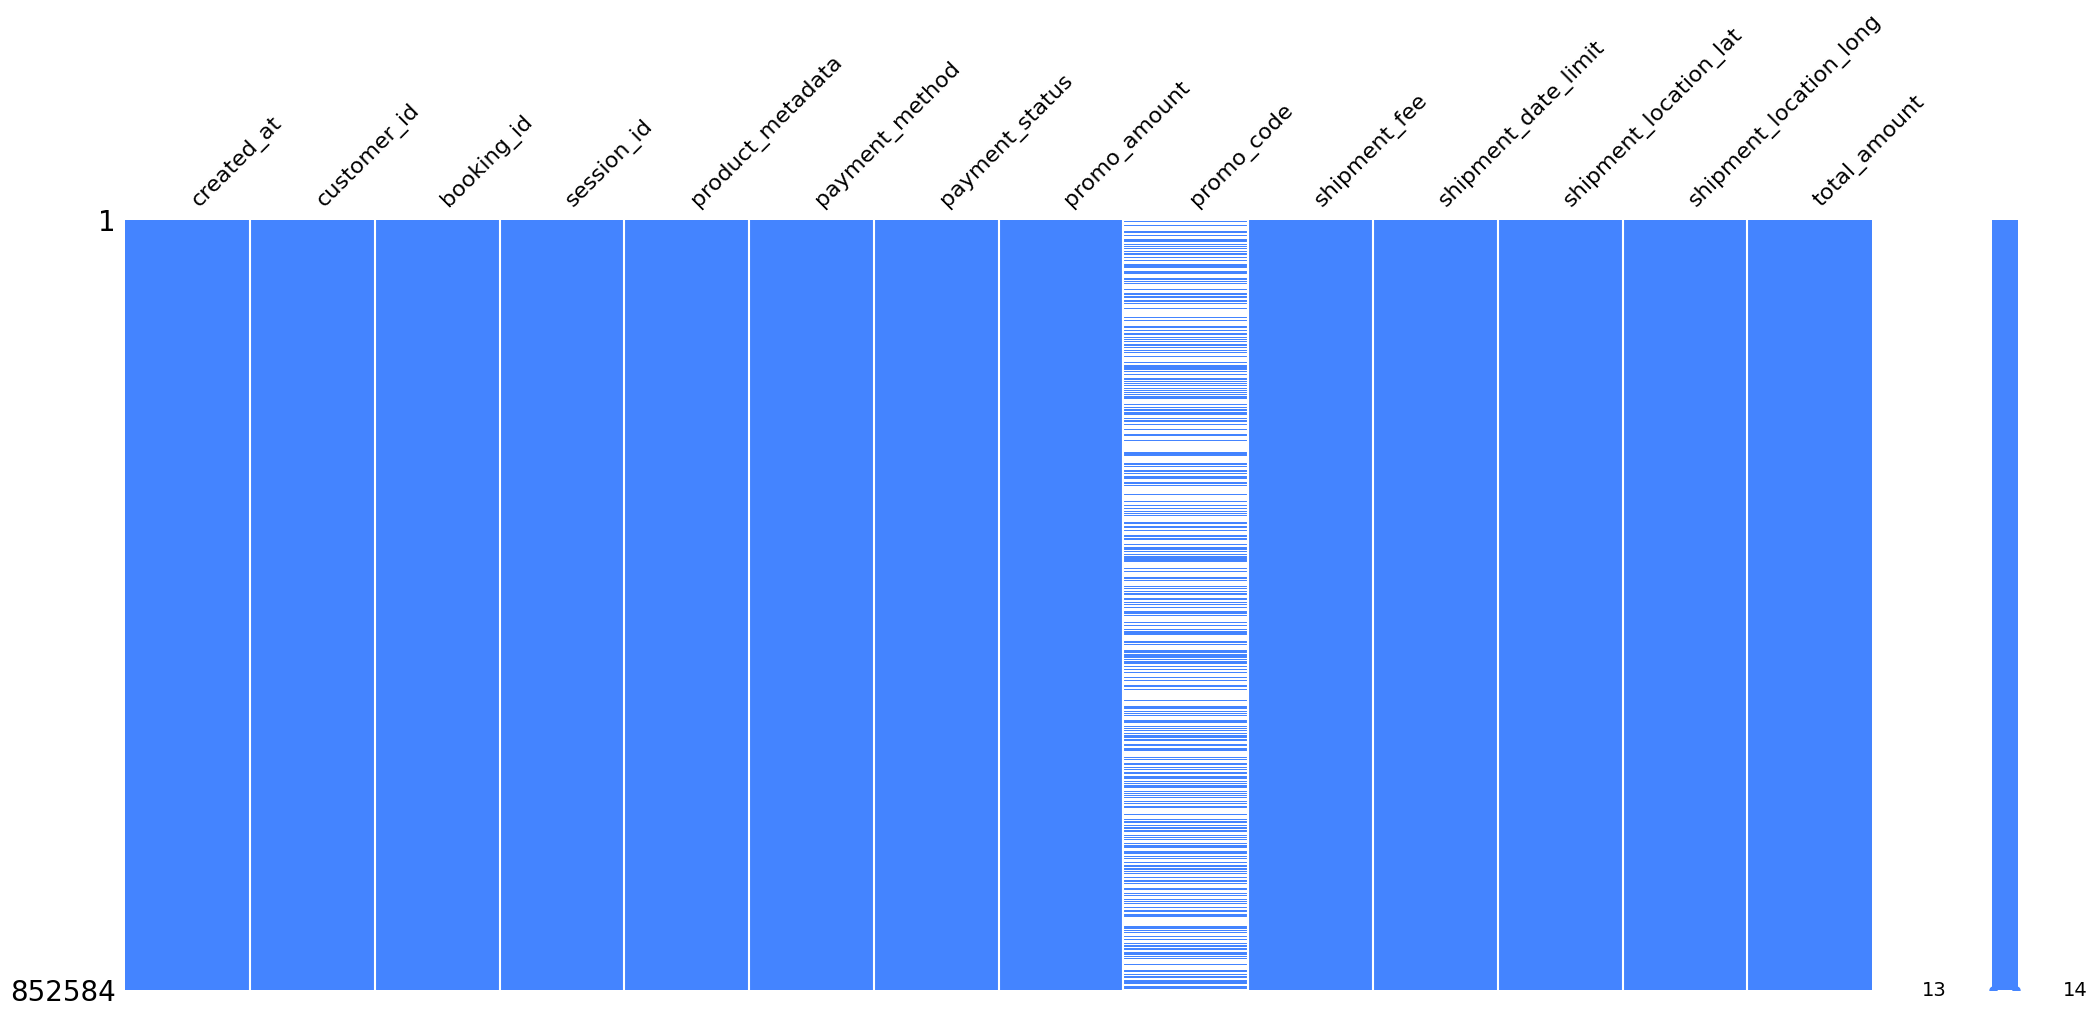

<Figure size 1000x600 with 0 Axes>

In [ ]:
msno.matrix(transactions, color=(0.27, 0.52, 1.0))
plt.figure(figsize=(10,6))
plt.show()

#### Duplicate
Tidak terdapat data duplikat pada dataset ini

In [ ]:
transactions.duplicated().sum()

0

In [ ]:
transactions.columns

Index(['created_at', 'customer_id', 'booking_id', 'session_id',
       'product_metadata', 'payment_method', 'payment_status', 'promo_amount',
       'promo_code', 'shipment_fee', 'shipment_date_limit',
       'shipment_location_lat', 'shipment_location_long', 'total_amount'],
      dtype='object')

#### Feature Engineering

In [ ]:
#1 Shipment Limit
transactions['shipment_limit'] = transactions['shipment_date_limit'] - transactions['created_at']
transactions['shipment_limit'] = transactions['shipment_limit'].dt.days

#2 Payment Method (One-Hot-Encoding)
transactions = pd.get_dummies(transactions, columns = ['payment_method'])

#### Persiapan Data

**Mengambil Payment Status yang Success**

In [ ]:
# Filter transaksi yang sukses
transactions = transactions[transactions['payment_status'] != 'Failed']

transactions

,created_at,customer_id,booking_id,session_id,product_metadata,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,shipment_limit,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,4,0,1,0,0,0
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526,3,1,0,0,0,0
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696,2,0,0,0,0,1
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012,4,1,0,0,0,0
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753,5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852578,2020-11-12 18:19:20.074873+00:00,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,"[{'product_id': 42915, 'quantity': 1, 'item_pr...",Success,0,NaN,10000,2020-11-18 18:06:06.493534+00:00,-6.286732,106.902229,287688,5,0,1,0,0,0
852580,2021-12-09 07:35:18.222046+00:00,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",Success,5010,AZ2022,10000,2021-12-12 07:52:44.803822+00:00,-8.677264,115.176947,359203,3,0,0,0,0,1
852581,2021-12-11 01:20:36.944593+00:00,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"[{'product_id': 13079, 'quantity': 4, 'item_pr...",Success,2181,WEEKENDSERU,5000,2021-12-12 13:28:22.848703+00:00,-6.185498,106.831093,1158159,1,1,0,0,0,0
852582,2019-12-18 11:01:09.623382+00:00,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"[{'product_id': 11312, 'quantity': 1, 'item_pr...",Success,4503,AZ2022,0,2019-12-23 22:56:46.831720+00:00,-7.155977,110.891858,184143,5,1,0,0,0,0


In [ ]:
transactions

,created_at,customer_id,booking_id,session_id,product_metadata,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,shipment_limit,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,4,0,1,0,0,0
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526,3,1,0,0,0,0
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696,2,0,0,0,0,1
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012,4,1,0,0,0,0
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753,5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852578,2020-11-12 18:19:20.074873+00:00,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,"[{'product_id': 42915, 'quantity': 1, 'item_pr...",Success,0,NaN,10000,2020-11-18 18:06:06.493534+00:00,-6.286732,106.902229,287688,5,0,1,0,0,0
852580,2021-12-09 07:35:18.222046+00:00,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",Success,5010,AZ2022,10000,2021-12-12 07:52:44.803822+00:00,-8.677264,115.176947,359203,3,0,0,0,0,1
852581,2021-12-11 01:20:36.944593+00:00,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"[{'product_id': 13079, 'quantity': 4, 'item_pr...",Success,2181,WEEKENDSERU,5000,2021-12-12 13:28:22.848703+00:00,-6.185498,106.831093,1158159,1,1,0,0,0,0
852582,2019-12-18 11:01:09.623382+00:00,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"[{'product_id': 11312, 'quantity': 1, 'item_pr...",Success,4503,AZ2022,0,2019-12-23 22:56:46.831720+00:00,-7.155977,110.891858,184143,5,1,0,0,0,0


In [ ]:
df_ca3 = transactions.copy()

In [ ]:
import ast

# Convert strings to dictionaries
df_ca3['product_metadata'] = df_ca3['product_metadata'].apply(ast.literal_eval)

# Explode 'product_metadata' and create new columns
df_ca3 = df_ca3.explode('product_metadata')

# Access dictionary values directly
df_ca3['product_id'] = df_ca3['product_metadata'].apply(lambda x: x['product_id'])
df_ca3['quantity'] = df_ca3['product_metadata'].apply(lambda x: x['quantity'])
df_ca3['item_price'] = df_ca3['product_metadata'].apply(lambda x: x['item_price'])

# Drop the original 'product_metadata' column
df_ca3.drop('product_metadata', axis=1, inplace=True)

# Show the resulting DataFrame
df_ca3

,created_at,customer_id,booking_id,session_id,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,...,total_amount,shipment_limit,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,product_id,quantity,item_price
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,...,199832,4,0,1,0,0,0,54728,1,191247
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.013470,...,155526,3,1,0,0,0,0,16193,1,145526
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,...,550696,2,0,0,0,0,1,53686,4,135174
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.602334,...,271012,4,1,0,0,0,0,20228,1,271012
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.602334,...,198753,5,1,0,0,0,0,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852578,2020-11-12 18:19:20.074873+00:00,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Success,0,NaN,10000,2020-11-18 18:06:06.493534+00:00,-6.286732,...,287688,5,0,1,0,0,0,42915,1,277688
852580,2021-12-09 07:35:18.222046+00:00,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,Success,5010,AZ2022,10000,2021-12-12 07:52:44.803822+00:00,-8.677264,...,359203,3,0,0,0,0,1,19394,1,354213
852581,2021-12-11 01:20:36.944593+00:00,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Success,2181,WEEKENDSERU,5000,2021-12-12 13:28:22.848703+00:00,-6.185498,...,1158159,1,1,0,0,0,0,13079,4,288835
852582,2019-12-18 11:01:09.623382+00:00,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Success,4503,AZ2022,0,2019-12-23 22:56:46.831720+00:00,-7.155977,...,184143,5,1,0,0,0,0,11312,1,188646


In [ ]:
df_ca3.describe()

,customer_id,promo_amount,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,shipment_limit,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,product_id,quantity,item_price
count,1.201035e+06,1.201035e+06,1.201035e+06,1.201035e+06,1.201035e+06,1.201035e+06,1.201035e+06,1.201035e+06,1.201035e+06,1.201035e+06,1.201035e+06,1.201035e+06,1.201035e+06,1.201035e+06,1.201035e+06
mean,4.982941e+04,2.049152e+03,9.195019e+03,-5.111361e+00,1.109809e+02,1.183279e+06,3.037154e+00,3.505285e-01,1.612817e-01,2.006195e-01,8.878759e-02,1.987827e-01,2.969572e+04,1.475735e+00,2.499464e+05
std,2.899469e+04,3.071014e+03,9.377882e+03,3.080413e+00,6.402282e+00,1.733350e+06,1.426907e+00,4.771357e-01,3.677908e-01,4.004640e-01,2.844370e-01,3.990843e-01,1.705194e+04,1.592453e+00,1.118829e+05
min,3.000000e+00,0.000000e+00,0.000000e+00,-1.099552e+01,9.503073e+01,1.089800e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.163000e+03,1.000000e+00,5.600000e+03
25%,2.457300e+04,0.000000e+00,0.000000e+00,-7.375831e+00,1.068634e+02,2.466450e+05,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.477100e+04,1.000000e+00,1.683510e+05
50%,4.960700e+04,0.000000e+00,1.000000e+04,-6.241815e+00,1.101724e+02,4.561390e+05,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.860800e+04,1.000000e+00,2.335040e+05
75%,7.496400e+04,4.001000e+03,1.000000e+04,-3.089314e+00,1.132233e+02,1.362115e+06,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.468800e+04,1.000000e+00,3.136010e+05
max,9.999900e+04,2.451900e+04,5.000000e+04,5.874791e+00,1.410061e+02,2.350449e+07,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+04,4.800000e+01,1.200357e+06


In [ ]:
transactions = transactions[['session_id','booking_id','created_at','customer_id','shipment_fee','shipment_limit','promo_amount','total_amount','payment_method_Credit Card','payment_method_Debit Card','payment_method_Gopay','payment_method_LinkAja','payment_method_OVO']]
transactions

,session_id,booking_id,created_at,customer_id,shipment_fee,shipment_limit,promo_amount,total_amount,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO
0,3abaa6ce-e320-4e51-9469-d9f3fa328e86,186e2bee-0637-4710-8981-50c2d737bc42,2018-07-29 15:22:01.458193+00:00,5868,10000,4,1415,199832,0,1,0,0,0
1,2ee5ead1-f13e-4759-92df-7ff48475e970,caadb57b-e808-4f94-9e96-8a7d4c9898db,2018-07-30 12:40:22.365620+00:00,4774,10000,3,0,155526,1,0,0,0,0
2,93325fb6-eb00-4268-bb0e-6471795a0ad0,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,2018-09-15 11:51:17.365620+00:00,4774,10000,2,0,550696,0,0,0,0,1
3,bcad5a61-1b67-448d-8ff4-781d67bc56e4,f5e530a7-4350-4cd1-a3bc-525b5037bcab,2018-11-01 11:23:48.365620+00:00,4774,0,4,0,271012,1,0,0,0,0
4,df1042ab-13e6-4072-b9d2-64a81974c51a,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,2018-12-18 11:20:30.365620+00:00,4774,0,5,0,198753,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852578,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,7fdc05d1-234b-4889-a343-587ffc0635d5,2020-11-12 18:19:20.074873+00:00,25121,10000,5,0,287688,0,1,0,0,0
852580,954e1211-4d45-4d0b-ba84-53e80119592c,ccde6b83-ee42-4cce-b2cd-976574886eac,2021-12-09 07:35:18.222046+00:00,34829,10000,3,5010,359203,0,0,0,0,1
852581,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,2021-12-11 01:20:36.944593+00:00,99645,5000,1,2181,1158159,1,0,0,0,0
852582,bb6e5426-a3f3-426a-b99d-79173eaa234b,af7f291a-b01b-4bfd-89a9-237b16368b15,2019-12-18 11:01:09.623382+00:00,87319,0,5,4503,184143,1,0,0,0,0


### Tabel Customer

In [ ]:
# created_at dan shipment_date_limit diubah dengan type date
customer = pd.read_csv("/content/drive/MyDrive/[SC5DS] Mockup Dataset (Customer Analytics)/customer.csv",
                           parse_dates = ["birthdate", "first_join_date"])

In [ ]:
customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [ ]:
customer.describe()

,customer_id,home_location_lat,home_location_long
count,100000.000000,100000.000000,100000.000000
mean,50000.500000,-5.106390,110.936081
std,28867.657797,3.088183,6.343363
min,1.000000,-10.845002,95.275319
25%,25000.750000,-7.372650,106.860628
50%,50000.500000,-6.240087,110.162010
75%,75000.250000,-3.092254,113.171187
max,100000.000000,5.818355,140.993119


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

#### Missing Value
tidak terdapat missing value pada data

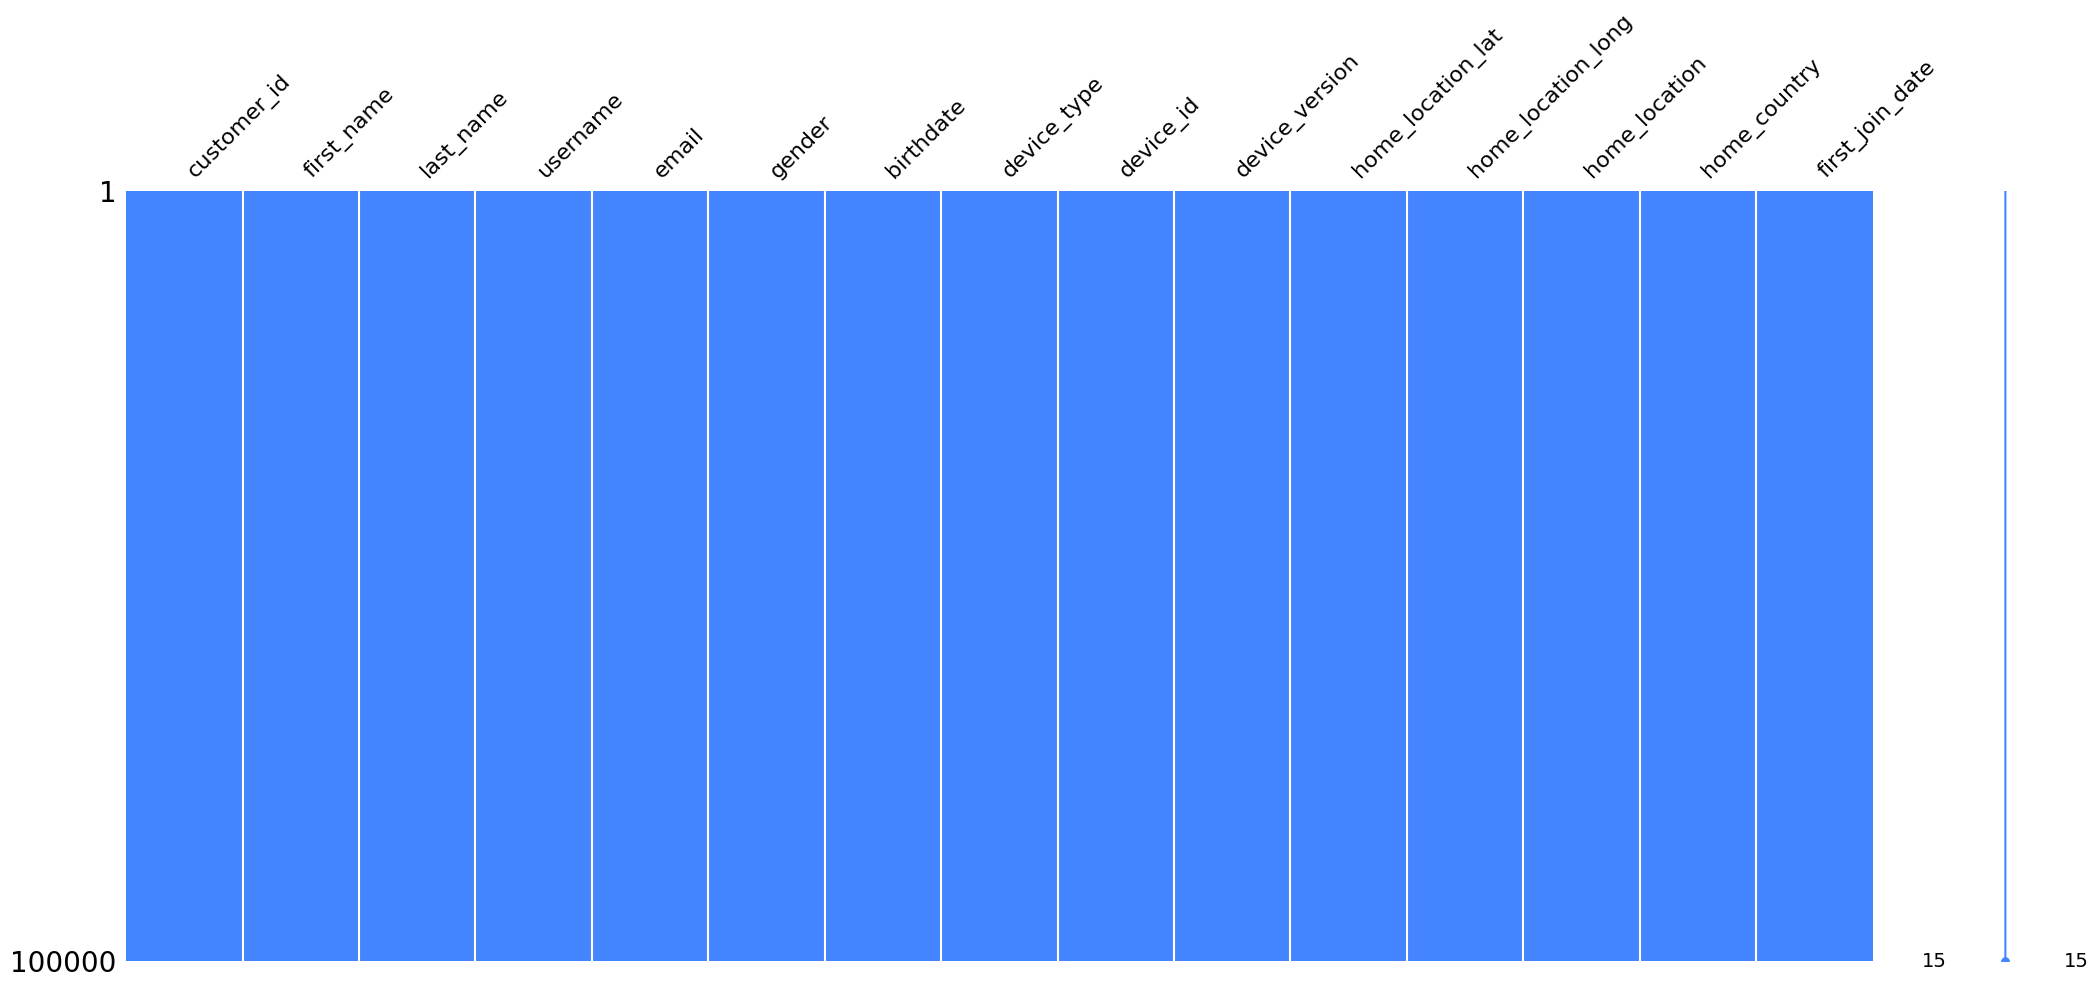

<Figure size 1000x600 with 0 Axes>

In [ ]:
msno.matrix(customer, color=(0.27, 0.52, 1.0))
plt.figure(figsize=(10,6))
plt.show()

#### Duplicate
Tidak terdapat data duplikat pada dataset ini

In [ ]:
customer.duplicated().sum()

0

#### Outlier

In [ ]:
customer.columns

Index(['customer_id', 'first_name', 'last_name', 'username', 'email', 'gender',
       'birthdate', 'device_type', 'device_id', 'device_version',
       'home_location_lat', 'home_location_long', 'home_location',
       'home_country', 'first_join_date'],
      dtype='object')

In [ ]:
# fig, ax = plt.subplots(1, 5, figsize=(11, 8))

# # draw boxplots - for one column in each subplot
# transactions.boxplot('Air temperature [K]', ax=ax[0])
# transactions.boxplot('Process temperature [K]', ax=ax[1])
# transactions.boxplot('Rotational speed [rpm]', ax=ax[2])
# transactions.boxplot('Torque [Nm]', ax=ax[3])
# transactions.boxplot('Tool wear [min]', ax=ax[4])

# plt.subplots_adjust(wspace=0.5)

# plt.show()

#### Persiapan Data

**Label encoding pada gender & device type**

In [ ]:
gender_mapping = {'F': 0, 'M': 1}
# Melakukan mapping pada kolom 'gender'
customer['gender'] = customer['gender'].map(gender_mapping)

device_mapping = {'iOS': 0, 'Android': 1}
# Melakukan mapping pada kolom 'gender'
customer['device_type'] = customer['device_type'].map(device_mapping)

**Variabel yang akan dipakai**

In [ ]:
# Menyeleksi kolom yang diinginkan
customer = customer[['customer_id','gender','device_type', 'first_join_date']]
customer

,customer_id,gender,device_type,first_join_date
0,2870,0,0,2019-07-21
1,8193,0,1,2017-07-16
2,7279,1,0,2020-08-23
3,88813,1,0,2021-10-03
4,82542,1,0,2021-04-11
...,...,...,...,...
99995,34743,1,1,2020-10-17
99996,72065,1,1,2017-11-25
99997,32818,0,1,2018-09-01
99998,75597,1,1,2020-05-31


# Pembagian Waktu

#### Data Belajar
```
# 1 Oktober 2021 - 31 Maret 2022 (1 April 2022 - 30 April 2022)
```



In [ ]:
# Membuat function
import datetime as dt

def timing_frame(start_test, duration_test, duration_train):

  end_test = start_test + dt.timedelta(days = duration_test)

  start_train = start_test - dt.timedelta(days = duration_train - 1)
  end_train = start_test - dt.timedelta(days = 1)

  return start_train, end_train, start_test, end_test

In [ ]:
start_train, end_train, start_test, end_test = timing_frame(dt.datetime(2022, 4, 1, tzinfo = dt.timezone.utc), 29, 183)
print(start_train)
print(end_train)
print(start_test)
print(end_test)

2021-10-01 00:00:00+00:00
2022-03-31 00:00:00+00:00
2022-04-01 00:00:00+00:00
2022-04-30 00:00:00+00:00


In [ ]:
def prepare_data(df):

  user_order = df.groupby('customer_id').agg({ 'booking_id': 'nunique',
                                                'created_at': 'max',
                                                'total_amount': 'sum',
                                                'shipment_fee': 'sum',
                                                'shipment_limit': 'max',
                                                'promo_amount': 'sum',
                                                'payment_method_Credit Card': 'sum',
                                                'payment_method_Debit Card': 'sum',
                                                'payment_method_Gopay': 'sum',
                                                'payment_method_LinkAja': 'sum',
                                                'payment_method_OVO': 'sum' })

  user_order.rename(columns={'booking_id': 'Frequency', 'total_amount': 'Monetary'}, inplace=True)

  # Merge customer information into the user_order DataFrame
  user_order = pd.merge(user_order, customer, on='customer_id', how='left')
  user_order["recency"] = (start_test - user_order["created_at"]).dt.days

  # Convert first_join_date_x to datetime and localize to UTC
  user_order["first_join_date"] = pd.to_datetime(user_order["first_join_date"]).dt.tz_localize('UTC')

  # Calculate Duration directly without localizing start_test
  user_order["Duration"] = (start_test - user_order["first_join_date"]).dt.days

  # # user_order = user_order.reset_index()

  return user_order

In [ ]:
filter_x = transactions[transactions["created_at"].between(start_train, end_train)]
filter_y = transactions[transactions["created_at"].between(start_test, end_test)]

In [ ]:
filter_x

,session_id,booking_id,created_at,customer_id,shipment_fee,shipment_limit,promo_amount,total_amount,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO
26,ced773bd-a755-4e23-a1ab-4a96ef9c75e1,6a32b1ef-142a-41f8-8046-f9b74676233d,2021-10-17 11:45:13.365620+00:00,4774,10000,4,2752,450657,1,0,0,0,0
27,e3bc7255-d3ad-4be9-98f4-f60efcc6f840,e319fd63-6af2-4103-bf76-4b84658ac92f,2021-12-03 11:55:49.365620+00:00,4774,10000,2,3830,488031,1,0,0,0,0
28,5d3d5de2-3a5a-42e9-8f8c-512346a4c031,0d1342a0-bac8-4837-bea6-4196033422a5,2022-01-19 11:25:46.365620+00:00,4774,5000,2,0,1078709,1,0,0,0,0
29,514d9158-5020-4dd9-8ca0-22097c600b78,e9597c94-dd17-4a93-81d9-aae586182d87,2022-03-07 10:53:30.365620+00:00,4774,10000,3,7255,311231,0,1,0,0,0
110,9af40f8b-7ce9-43dc-80d0-0a9dfdfc4ff9,93955c7e-8b65-4243-a18b-15333c4ae4f1,2021-10-11 18:58:21.162570+00:00,58191,0,4,0,85739,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852543,cb4c92d5-69d7-44e3-a5a1-bd5a59e2da7c,a7632a67-d65c-4667-afa3-9e8127cdbd41,2022-03-06 04:29:37.803983+00:00,32621,0,2,9701,213438,0,0,0,0,1
852564,b4a2ca36-4250-47cb-b799-89db41316b1b,bee016e5-7dd9-4689-bad0-3dfdaf09ba99,2022-01-10 13:51:41.359304+00:00,64772,10000,3,0,196191,0,0,0,0,1
852571,8d9f019f-600c-439e-b302-0779540e0561,7a6ecaf3-316d-40b2-b366-8f670d669c30,2021-12-27 20:11:09.098790+00:00,37287,25000,4,2603,340924,0,0,0,0,1
852580,954e1211-4d45-4d0b-ba84-53e80119592c,ccde6b83-ee42-4cce-b2cd-976574886eac,2021-12-09 07:35:18.222046+00:00,34829,10000,3,5010,359203,0,0,0,0,1


In [ ]:
filter_x['promo_amount'].describe()

count    149123.000000
mean       1796.794646
std        2961.384764
min           0.000000
25%           0.000000
50%           0.000000
75%        3483.000000
max       24153.000000
Name: promo_amount, dtype: float64

In [ ]:
filteer_x = filter_x[filter_x['promo_amount'] != 0]

filteer_x

,session_id,booking_id,created_at,customer_id,shipment_fee,shipment_limit,promo_amount,total_amount,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO
26,ced773bd-a755-4e23-a1ab-4a96ef9c75e1,6a32b1ef-142a-41f8-8046-f9b74676233d,2021-10-17 11:45:13.365620+00:00,4774,10000,4,2752,450657,1,0,0,0,0
27,e3bc7255-d3ad-4be9-98f4-f60efcc6f840,e319fd63-6af2-4103-bf76-4b84658ac92f,2021-12-03 11:55:49.365620+00:00,4774,10000,2,3830,488031,1,0,0,0,0
29,514d9158-5020-4dd9-8ca0-22097c600b78,e9597c94-dd17-4a93-81d9-aae586182d87,2022-03-07 10:53:30.365620+00:00,4774,10000,3,7255,311231,0,1,0,0,0
112,5f42918e-b3a7-432c-b31b-01708be78a63,b11a1f9b-8416-4cb2-89b4-b3aeb75e5bbd,2021-11-10 18:36:01.162570+00:00,58191,10000,5,5521,146737,0,0,0,0,1
116,6240caad-6a41-4cf5-bcff-90df3090fabe,b513b899-946d-4c96-8d2b-32a902201f52,2022-01-09 18:44:40.162570+00:00,58191,10000,5,4063,369557,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852454,bef7abdc-bb58-4a59-b799-53b056d22218,51650fa9-cbbb-4f23-8d06-9c70e8397a9e,2022-01-10 14:21:58.710211+00:00,11318,0,2,2508,247551,0,0,0,0,1
852543,cb4c92d5-69d7-44e3-a5a1-bd5a59e2da7c,a7632a67-d65c-4667-afa3-9e8127cdbd41,2022-03-06 04:29:37.803983+00:00,32621,0,2,9701,213438,0,0,0,0,1
852571,8d9f019f-600c-439e-b302-0779540e0561,7a6ecaf3-316d-40b2-b366-8f670d669c30,2021-12-27 20:11:09.098790+00:00,37287,25000,4,2603,340924,0,0,0,0,1
852580,954e1211-4d45-4d0b-ba84-53e80119592c,ccde6b83-ee42-4cce-b2cd-976574886eac,2021-12-09 07:35:18.222046+00:00,34829,10000,3,5010,359203,0,0,0,0,1


In [ ]:
filteer_x['promo_amount'].describe()

count    50154.000000
mean      5342.413526
std       2670.780815
min        297.000000
25%       3444.000000
50%       4834.000000
75%       6656.750000
max      24153.000000
Name: promo_amount, dtype: float64

##### **Churn Prediction**

In [ ]:
X1 = prepare_data(filter_x)
y1 = prepare_data(filter_y)

In [ ]:
# Merge customer information into the rfm DataFrame
X1 = X1.merge(y1, on='customer_id', how='left')

In [ ]:
X1["is_churn"] = X1['Frequency_y'].isna().astype("int")
X1

,customer_id,Frequency_x,created_at_x,Monetary_x,shipment_fee_x,shipment_limit_x,promo_amount_x,payment_method_Credit Card_x,payment_method_Debit Card_x,payment_method_Gopay_x,...,payment_method_Debit Card_y,payment_method_Gopay_y,payment_method_LinkAja_y,payment_method_OVO_y,gender_y,device_type_y,first_join_date_y,recency_y,Duration_y,is_churn
0,3,5,2022-03-06 13:28:13.844494+00:00,2920596,30000,4,18513,4,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,2018-08-25 00:00:00+00:00,-3.0,1315.0,0
1,8,2,2022-02-28 21:54:59.656991+00:00,1128165,20000,4,0,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
2,9,3,2022-03-22 05:56:29.421034+00:00,1388430,20000,4,0,1,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
3,11,1,2022-03-07 14:29:13.759159+00:00,197533,15000,1,9492,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
4,15,1,2022-01-05 06:07:58.105040+00:00,73320,10000,4,3880,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32816,99988,4,2022-03-06 06:17:35.735285+00:00,2418947,30000,5,14719,0,4,0,...,1.0,0.0,0.0,0.0,0.0,0.0,2019-06-09 00:00:00+00:00,-15.0,1027.0,0
32817,99989,1,2021-12-03 05:23:33.024729+00:00,955418,10000,5,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,2021-04-04 00:00:00+00:00,-3.0,362.0,0
32818,99992,3,2022-03-23 08:45:11.873510+00:00,408433,10000,3,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
32819,99995,15,2022-03-18 23:42:59.810263+00:00,7708185,140000,5,21608,12,1,1,...,0.0,0.0,1.0,0.0,0.0,1.0,2020-08-16 00:00:00+00:00,-24.0,593.0,0


In [ ]:
X1

,customer_id,Frequency_x,created_at_x,Monetary_x,shipment_fee_x,shipment_limit_x,promo_amount_x,payment_method_Credit Card_x,payment_method_Debit Card_x,payment_method_Gopay_x,...,payment_method_Debit Card_y,payment_method_Gopay_y,payment_method_LinkAja_y,payment_method_OVO_y,gender_y,device_type_y,first_join_date_y,recency_y,Duration_y,is_churn
0,3,5,2022-03-06 13:28:13.844494+00:00,2920596,30000,4,18513,4,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,2018-08-25 00:00:00+00:00,-3.0,1315.0,0
1,8,2,2022-02-28 21:54:59.656991+00:00,1128165,20000,4,0,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
2,9,3,2022-03-22 05:56:29.421034+00:00,1388430,20000,4,0,1,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
3,11,1,2022-03-07 14:29:13.759159+00:00,197533,15000,1,9492,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
4,15,1,2022-01-05 06:07:58.105040+00:00,73320,10000,4,3880,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32816,99988,4,2022-03-06 06:17:35.735285+00:00,2418947,30000,5,14719,0,4,0,...,1.0,0.0,0.0,0.0,0.0,0.0,2019-06-09 00:00:00+00:00,-15.0,1027.0,0
32817,99989,1,2021-12-03 05:23:33.024729+00:00,955418,10000,5,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,2021-04-04 00:00:00+00:00,-3.0,362.0,0
32818,99992,3,2022-03-23 08:45:11.873510+00:00,408433,10000,3,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
32819,99995,15,2022-03-18 23:42:59.810263+00:00,7708185,140000,5,21608,12,1,1,...,0.0,0.0,1.0,0.0,0.0,1.0,2020-08-16 00:00:00+00:00,-24.0,593.0,0


In [ ]:
X1.describe()

,customer_id,Frequency_x,Monetary_x,shipment_fee_x,shipment_limit_x,promo_amount_x,payment_method_Credit Card_x,payment_method_Debit Card_x,payment_method_Gopay_x,payment_method_LinkAja_x,...,payment_method_Credit Card_y,payment_method_Debit Card_y,payment_method_Gopay_y,payment_method_LinkAja_y,payment_method_OVO_y,gender_y,device_type_y,recency_y,Duration_y,is_churn
count,32821.000000,32821.000000,3.282100e+04,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,32821.000000,...,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,32821.000000
mean,49838.684044,4.543524,2.490010e+06,41792.602297,4.000244,8163.779531,1.600317,0.725572,0.910758,0.401542,...,0.539063,0.247743,0.309679,0.139461,0.305405,0.357891,0.767425,-17.766101,803.337306,0.493800
std,28986.140826,5.577440,3.527701e+06,54984.571334,1.311111,11877.006175,3.409011,2.158068,2.459641,1.403021,...,0.891385,0.621757,0.686074,0.439972,0.718669,0.479394,0.422486,7.991331,594.036021,0.499969
min,3.000000,1.000000,2.188500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,2.000000,0.000000
25%,24747.000000,1.000000,4.244320e+05,10000.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-25.000000,261.250000,0.000000
50%,49672.000000,2.000000,1.125485e+06,20000.000000,4.000000,4496.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-19.000000,650.000000,0.000000
75%,74965.000000,5.000000,3.079979e+06,50000.000000,5.000000,10936.000000,2.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-12.000000,1293.000000,1.000000
max,99998.000000,86.000000,5.810018e+07,795000.000000,6.000000,197226.000000,72.000000,48.000000,55.000000,39.000000,...,14.000000,9.000000,9.000000,10.000000,24.000000,1.000000,1.000000,-1.000000,2100.000000,1.000000


In [ ]:
X1.columns

Index(['customer_id', 'Frequency_x', 'created_at_x', 'Monetary_x',
       'shipment_fee_x', 'shipment_limit_x', 'promo_amount_x',
       'payment_method_Credit Card_x', 'payment_method_Debit Card_x',
       'payment_method_Gopay_x', 'payment_method_LinkAja_x',
       'payment_method_OVO_x', 'gender_x', 'device_type_x',
       'first_join_date_x', 'recency_x', 'Duration_x', 'Frequency_y',
       'created_at_y', 'Monetary_y', 'shipment_fee_y', 'shipment_limit_y',
       'promo_amount_y', 'payment_method_Credit Card_y',
       'payment_method_Debit Card_y', 'payment_method_Gopay_y',
       'payment_method_LinkAja_y', 'payment_method_OVO_y', 'gender_y',
       'device_type_y', 'first_join_date_y', 'recency_y', 'Duration_y',
       'is_churn'],
      dtype='object')

In [ ]:
# Function untuk mendeteksi outliers
def check_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

# Data numerik yang ingin diperiksa
numerik = ['Frequency_x', 'Monetary_x',
       'shipment_fee_x', 'shipment_limit_x', 'promo_amount_x','recency_x', 'Duration_x']

# Menghitung jumlah outliers untuk setiap fitur numerik
outliers1 = check_outliers(X1[numerik])

# Membuat DataFrame dari hasil perhitungan
outliers_X1 = pd.DataFrame({'Feature': outliers1.index, 'Number of Outliers': outliers1.values})

# Menampilkan DataFrame
outliers_X1


,Feature,Number of Outliers
0,Frequency_x,1243
1,Monetary_x,1161
2,shipment_fee_x,1171
3,shipment_limit_x,0
4,promo_amount_x,688
5,recency_x,0
6,Duration_x,0


In [ ]:
# Mengambil kolom yang mengandung "_x"
X2 = X1.filter(like="_x")

# Tambahkan kolom "is_churn" ke dalam DataFrame yang sudah difilter
Data = X2.join(X1['is_churn'])

# Mengganti nama kolom dengan menghapus "_x"
Data.columns = Data.columns.str.replace("_x", "")

# Membuang variabel yang tidak dipakai
X3 = ['created_at', 'first_join_date']
# Menghapus kolom-kolom tertentu dari DataFrame
X2 = Data.drop(columns=X3)

In [ ]:
X2

,Frequency,Monetary,shipment_fee,shipment_limit,promo_amount,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,gender,device_type,recency,Duration,is_churn
0,5,2920596,30000,4,18513,4,0,0,0,1,1,1,25,1315,0
1,2,1128165,20000,4,0,2,0,0,0,0,0,1,31,412,1
2,3,1388430,20000,4,0,1,0,2,0,0,0,1,9,279,1
3,1,197533,15000,1,9492,0,0,0,0,1,1,1,24,26,1
4,1,73320,10000,4,3880,1,0,0,0,0,0,1,85,916,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32816,4,2418947,30000,5,14719,0,4,0,0,0,0,0,25,1027,0
32817,1,955418,10000,5,0,0,0,0,0,1,0,1,118,362,0
32818,3,408433,10000,3,0,0,0,1,0,2,0,1,8,640,1
32819,15,7708185,140000,5,21608,12,1,1,0,1,0,1,13,593,0


In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32821 entries, 0 to 32820
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Frequency                   32821 non-null  int64
 1   Monetary                    32821 non-null  int64
 2   shipment_fee                32821 non-null  int64
 3   shipment_limit              32821 non-null  int64
 4   promo_amount                32821 non-null  int64
 5   payment_method_Credit Card  32821 non-null  uint8
 6   payment_method_Debit Card   32821 non-null  uint8
 7   payment_method_Gopay        32821 non-null  uint8
 8   payment_method_LinkAja      32821 non-null  uint8
 9   payment_method_OVO          32821 non-null  uint8
 10  gender                      32821 non-null  int64
 11  device_type                 32821 non-null  int64
 12  recency                     32821 non-null  int64
 13  Duration                    32821 non-null  int64
 14  is_chu

**Simpen Data Sebagai CSV**

In [ ]:
# Simpan DataFrame sebagai file CSV
X2.to_csv('data.csv', index=False)

##### Processing Data

In [ ]:
X = X2.drop(['is_churn'], axis = 1)
y = X2['is_churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [ ]:
numerik = ['Frequency',	'Monetary',	'shipment_fee',	'shipment_limit',	'promo_amount','recency','Duration']
# Feature Scaling menggunakan MinMaxScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train[numerik] = scaler.fit_transform(X_train[numerik])
X_test[numerik] = scaler.transform(X_test[numerik])

##### Pemodelan

###### **Logistic Regression**

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Prediction of the test variable
lr_y_preds=lr.predict(X_test)

In [ ]:
#Training score
print("Training Score :", lr.score(X_train,y_train))
print("Testing Score :", lr.score(X_test,y_test))

Training Score : 0.7951597457995996
Testing Score : 0.7926271961003352


In [ ]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      5009
           1       0.74      0.90      0.81      4838

    accuracy                           0.79      9847
   macro avg       0.81      0.79      0.79      9847
weighted avg       0.81      0.79      0.79      9847



In [ ]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(3,3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

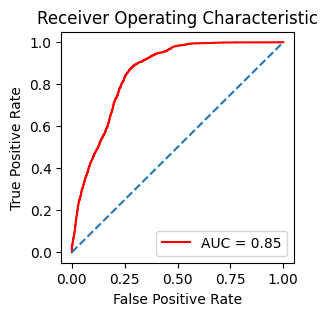

In [ ]:
#ROC Curve
y_proba_log=lr.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_log[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Membuat model
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", gbc.score(X_train,y_train))
print("Testing Score :", gbc.score(X_test,y_test))

Training Score : 0.8792548097849743
Testing Score : 0.87844013405098


In [ ]:
# Menampilkan classification report
y_pred_gbc = gbc.predict(X_test)
print(classification_report(y_test,y_pred_gbc))
# # Prediksi churn untuk bulan kedepan
# prediksi_bulan_depan = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.83      0.87      5009
           1       0.84      0.93      0.88      4838

    accuracy                           0.88      9847
   macro avg       0.88      0.88      0.88      9847
weighted avg       0.88      0.88      0.88      9847



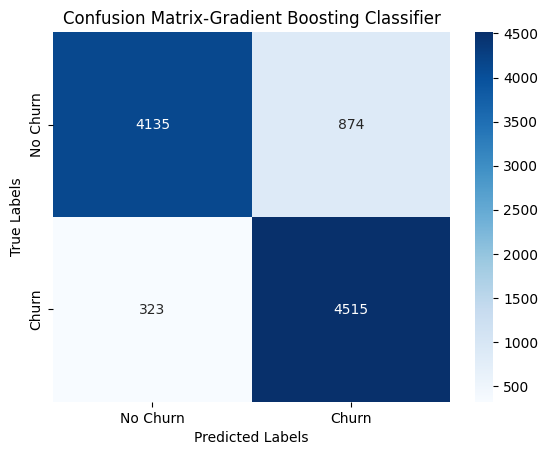

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbc)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'Blues');

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix-Gradient Boosting Classifier');
ax.xaxis.set_ticklabels(['No Churn', 'Churn']);
ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

In [ ]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(3,3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

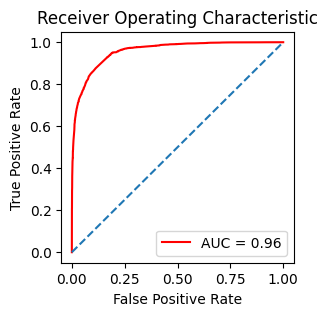

In [ ]:
y_proba_gbc= gbc.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_gbc[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

In [ ]:
# # Get feature importances
# importances = gbc.feature_importances_

# # Calculate total importance
# total_importance = sum(importances)

# # Print percentage feature importances
# for feature, importance in zip(X_train.columns, importances):
#     percentage_importance = (importance / total_importance) * 100
#     print(f"{feature}: {percentage_importance:.2f}%")
# # Calculate percentage feature importances
# percentage_importances = [(importance / total_importance) * 100 for importance in importances]

# # Create a sorted list of feature names and percentage importances
# sorted_features = [feature for _, feature in sorted(zip(percentage_importances, X_train.columns))]
# sorted_importances = sorted(percentage_importances)

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(sorted_features)), sorted_importances, align='center')
# plt.yticks(range(len(sorted_features)), sorted_features)
# plt.xlabel('Percentage Importance')
# plt.title('Feature Importances')
# plt.show()

###### **XGBoost**

In [ ]:
import xgboost as xgb
# Membuat model
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", xgb.score(X_train,y_train))
print("Testing Score :", xgb.score(X_test,y_test))

Training Score : 0.9401062070166275
Testing Score : 0.8865644358687925


In [ ]:
# Menampilkan classification report
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      5009
           1       0.87      0.91      0.89      4838

    accuracy                           0.89      9847
   macro avg       0.89      0.89      0.89      9847
weighted avg       0.89      0.89      0.89      9847



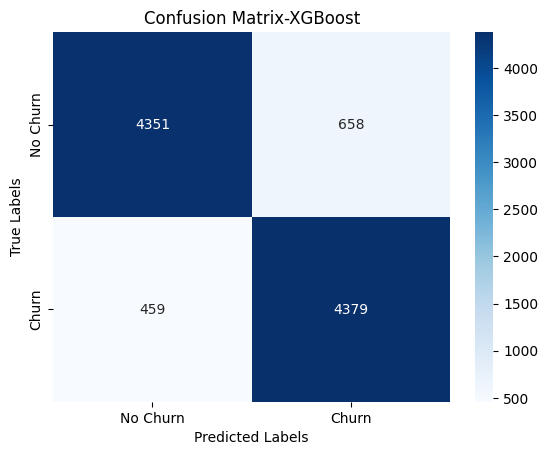

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'Blues');

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix-XGBoost');
ax.xaxis.set_ticklabels(['No Churn', 'Churn']);
ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

In [ ]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(3,3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

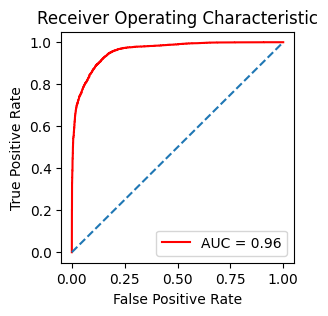

In [ ]:
y_proba_xgb= xgb.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_xgb[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Membuat model
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", rfc.score(X_train,y_train))
print("Testing Score :", rfc.score(X_test,y_test))

Training Score : 1.0
Testing Score : 0.8767137199146948


In [ ]:
# Menampilkan classification report
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      5009
           1       0.86      0.89      0.88      4838

    accuracy                           0.88      9847
   macro avg       0.88      0.88      0.88      9847
weighted avg       0.88      0.88      0.88      9847



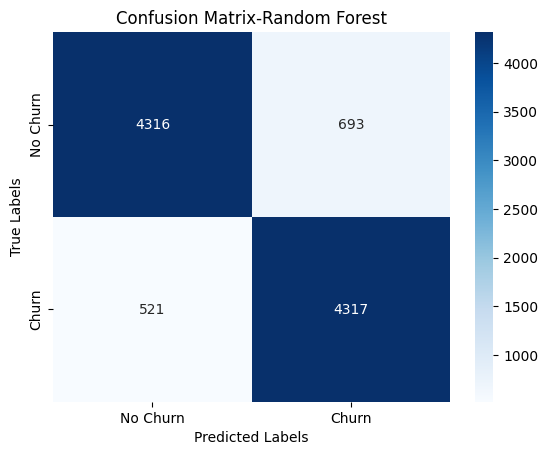

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfc)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'Blues');

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix-Random Forest');
ax.xaxis.set_ticklabels(['No Churn', 'Churn']);
ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

In [ ]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(3,3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

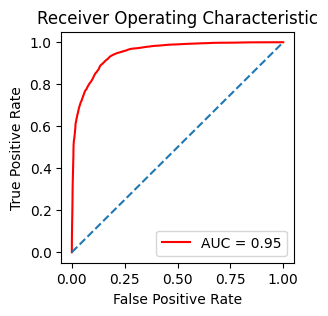

In [ ]:
y_proba_rfc= rfc.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_rfc[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Inisialisasi model CatBoost
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", nb.score(X_train, y_train))
print("Testing Score :", nb.score(X_test, y_test))

Training Score : 0.7547662575084878
Testing Score : 0.7512948106022139


In [ ]:
# Menampilkan classification report
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.58      0.70      5009
           1       0.68      0.93      0.79      4838

    accuracy                           0.75      9847
   macro avg       0.79      0.75      0.74      9847
weighted avg       0.79      0.75      0.74      9847



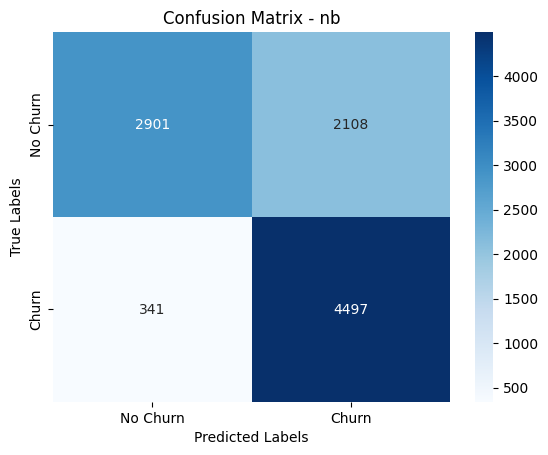

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - nb')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

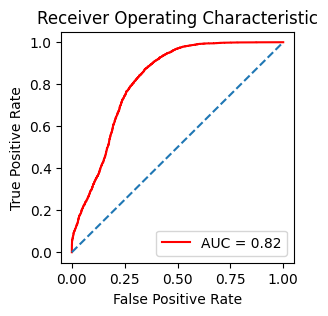

In [ ]:
y_proba_nb= nb.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_nb[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Inisialisasi model AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", adaboost.score(X_train, y_train))
print("Testing Score :", adaboost.score(X_test, y_test))

Training Score : 0.8631496474275268
Testing Score : 0.8588402559155073


In [ ]:
# Menampilkan classification report
y_pred_adaboost = adaboost.predict(X_test)
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85      5009
           1       0.82      0.91      0.86      4838

    accuracy                           0.86      9847
   macro avg       0.86      0.86      0.86      9847
weighted avg       0.86      0.86      0.86      9847



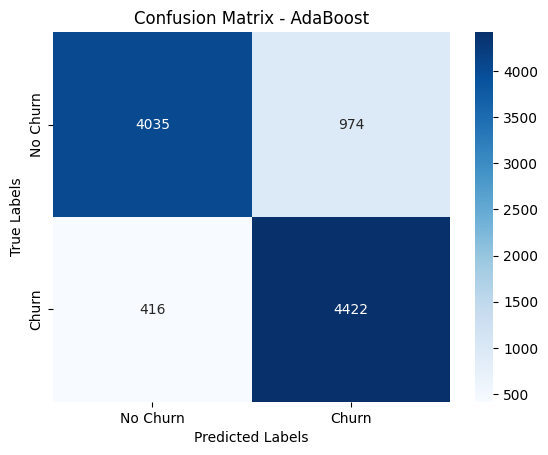

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_adaboost)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - AdaBoost')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

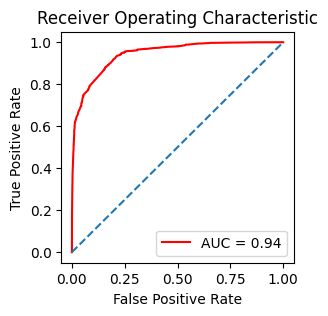

In [ ]:
y_proba_adaBoost= adaboost.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_adaBoost[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Inisialisasi model Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [ ]:

# Menampilkan training score dan testing score
print("Training Score :", nn_model.score(X_train, y_train))
print("Testing Score :", nn_model.score(X_test, y_test))



Training Score : 0.8994950813963611
Testing Score : 0.8548796587793237


In [ ]:
# Menampilkan classification report
y_pred_nn = nn_model.predict(X_test)
print(classification_report(y_test, y_pred_nn))



              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5009
           1       0.86      0.84      0.85      4838

    accuracy                           0.85      9847
   macro avg       0.86      0.85      0.85      9847
weighted avg       0.86      0.85      0.85      9847



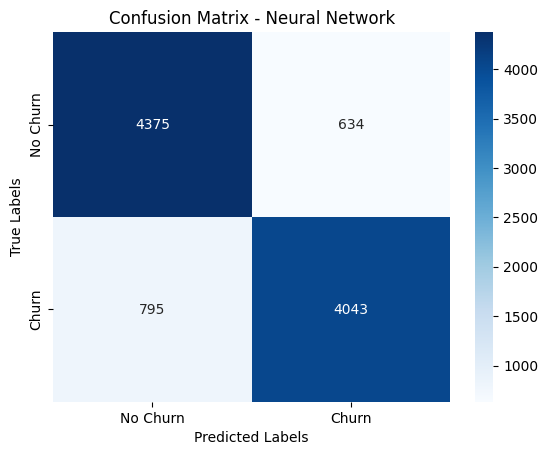

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nn)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - Neural Network')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

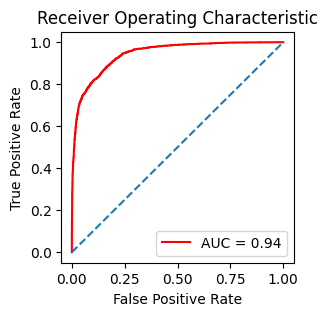

In [ ]:
y_proba_nn= nn_model.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_nn[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **lightGBM**

In [ ]:
import lightgbm as lgb

# Inisialisasi model LightGBM
lgb = lgb.LGBMClassifier()
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11369, number of negative: 11605
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1258
[LightGBM] [Info] Number of data points in the train set: 22974, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494864 -> initscore=-0.020546
[LightGBM] [Info] Start training from score -0.020546


LGBMClassifier()

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", lgb.score(X_train, y_train))
print("Testing Score :", lgb.score(X_test, y_test))

Training Score : 0.9069382780534517
Testing Score : 0.8887986188686909


In [ ]:
# Menampilkan classification report
y_pred_lgb = lgb.predict(X_test)
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      5009
           1       0.87      0.92      0.89      4838

    accuracy                           0.89      9847
   macro avg       0.89      0.89      0.89      9847
weighted avg       0.89      0.89      0.89      9847



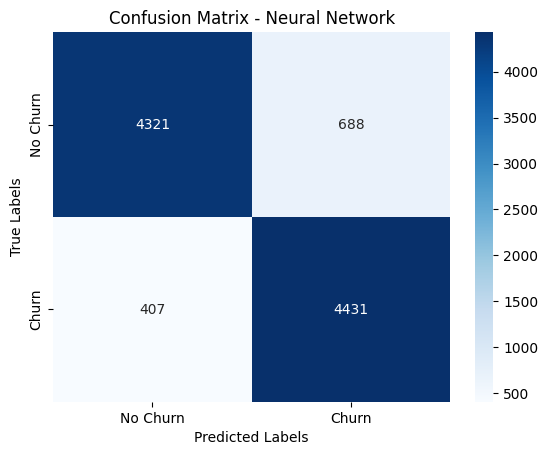

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgb)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - Neural Network')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

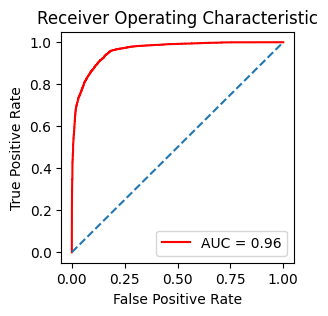

In [ ]:
y_proba_lgb= lgb.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_lgb[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **CatBoostClassifier**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 17.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
# Inisialisasi model CatBoost
catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42)
catboost_model.fit(X_train, y_train)

0:	learn: 0.6462469	total: 51.3ms	remaining: 5.08s
1:	learn: 0.6052386	total: 55ms	remaining: 2.69s
2:	learn: 0.5703463	total: 58.1ms	remaining: 1.88s
3:	learn: 0.5444976	total: 61.4ms	remaining: 1.47s
4:	learn: 0.5219888	total: 65.1ms	remaining: 1.24s
5:	learn: 0.4978943	total: 68.6ms	remaining: 1.07s
6:	learn: 0.4777469	total: 71.8ms	remaining: 954ms
7:	learn: 0.4592485	total: 74.9ms	remaining: 861ms
8:	learn: 0.4432729	total: 78.8ms	remaining: 797ms
9:	learn: 0.4293472	total: 82.1ms	remaining: 739ms
10:	learn: 0.4156926	total: 86ms	remaining: 695ms
11:	learn: 0.4057727	total: 88.7ms	remaining: 650ms
12:	learn: 0.3957260	total: 92.1ms	remaining: 616ms
13:	learn: 0.3864078	total: 95.7ms	remaining: 588ms
14:	learn: 0.3778926	total: 99.1ms	remaining: 562ms
15:	learn: 0.3711829	total: 102ms	remaining: 538ms
16:	learn: 0.3652065	total: 109ms	remaining: 531ms
17:	learn: 0.3587727	total: 112ms	remaining: 512ms
18:	learn: 0.3527822	total: 115ms	remaining: 492ms
19:	learn: 0.3467327	total: 11

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", catboost_model.score(X_train, y_train))
print("Testing Score :", catboost_model.score(X_test, y_test))

Training Score : 0.8825628971881258
Testing Score : 0.8820960698689956


In [ ]:
# Menampilkan classification report
y_pred_catboost = catboost_model.predict(X_test)
print(classification_report(y_test, y_pred_catboost))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      5009
           1       0.84      0.93      0.89      4838

    accuracy                           0.88      9847
   macro avg       0.89      0.88      0.88      9847
weighted avg       0.89      0.88      0.88      9847



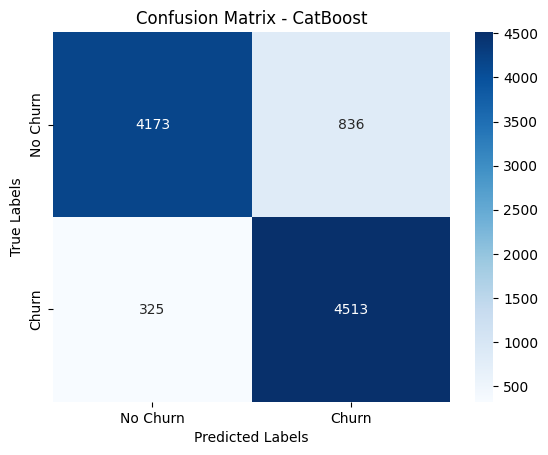

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_catboost)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - CatBoost')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

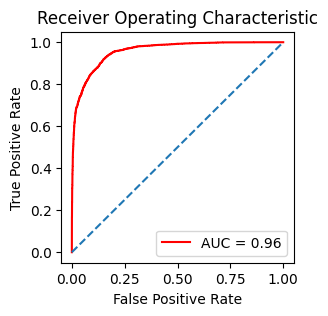

In [ ]:
y_proba_catboost= catboost_model.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_catboost[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **Extra Trees Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# Inisialisasi model Extra Trees
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", extra_trees_model.score(X_train, y_train))
print("Testing Score :", extra_trees_model.score(X_test, y_test))

Training Score : 1.0
Testing Score : 0.8455367116888393


In [ ]:
# Menampilkan classification report
y_pred_extra_trees = extra_trees_model.predict(X_test)
print(classification_report(y_test, y_pred_extra_trees))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      5009
           1       0.82      0.87      0.85      4838

    accuracy                           0.85      9847
   macro avg       0.85      0.85      0.85      9847
weighted avg       0.85      0.85      0.85      9847



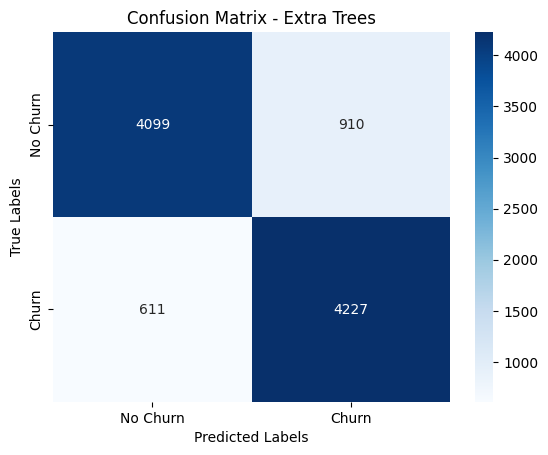

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_extra_trees)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - Extra Trees')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

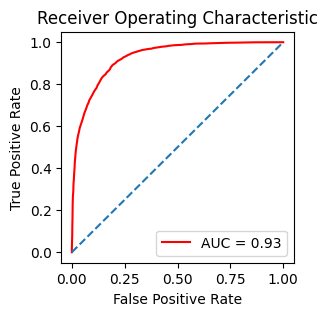

In [ ]:
y_proba_ExtraTrees= extra_trees_model.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_ExtraTrees[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

##### Prediksi

In [ ]:
y_proba_lgb

array([[9.92271727e-01, 7.72827282e-03],
       [9.99328307e-01, 6.71693099e-04],
       [5.07757868e-01, 4.92242132e-01],
       ...,
       [4.00657904e-03, 9.95993421e-01],
       [4.70159555e-01, 5.29840445e-01],
       [3.73269085e-02, 9.62673091e-01]])

In [ ]:
my_array = y_proba_lgb
my_dataframe = pd.DataFrame(my_array, columns=['Column1', 'Column2'])

In [ ]:
del my_dataframe['Column2']

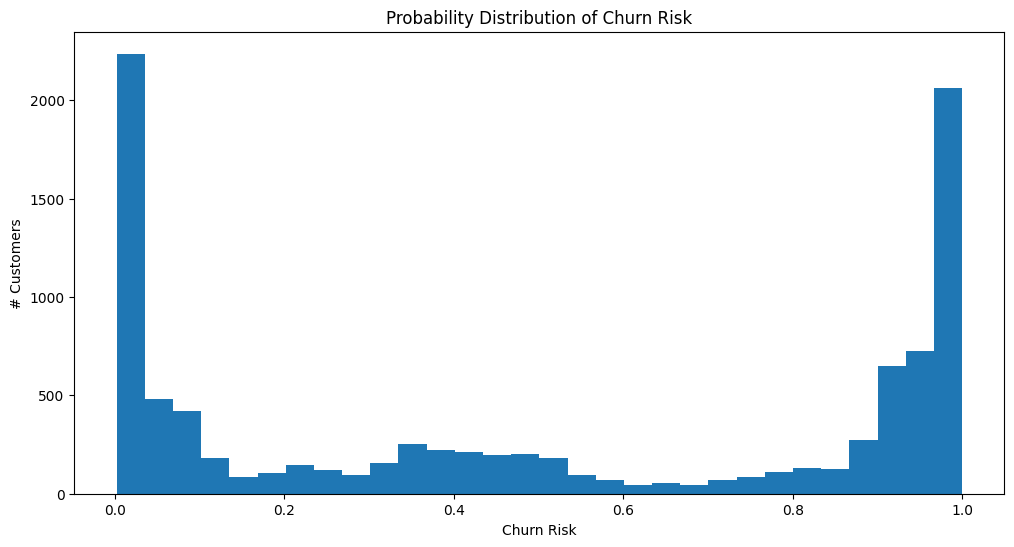

In [ ]:
# Import the libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
plt.figure(figsize=(12, 6))
# matplotlib histogram
plt.hist(my_dataframe, bins = int(180/6))

# # seaborn histogram
# sns.distplot(probs, hist=True, kde=False,
#              bins=int(180/5), color = 'blue',
#              hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Probability Distribution of Churn Risk')
plt.xlabel('Churn Risk')
plt.ylabel('# Customers')
plt.show()

In [ ]:
# Merge X2 dan my_dataframe

august_pred = pd.merge(X2, my_dataframe, left_index=True, right_index=True)
august_pred.rename(columns={'Column1': 'Probability'}, inplace=True)
august_pred

,Frequency,Monetary,shipment_fee,shipment_limit,promo_amount,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,gender,device_type,recency,Duration,is_churn,Probability
0,5,2920596,30000,4,18513,4,0,0,0,1,1,1,25,1315,0,0.992272
1,2,1128165,20000,4,0,2,0,0,0,0,0,1,31,412,1,0.999328
2,3,1388430,20000,4,0,1,0,2,0,0,0,1,9,279,1,0.507758
3,1,197533,15000,1,9492,0,0,0,0,1,1,1,24,26,1,0.021219
4,1,73320,10000,4,3880,1,0,0,0,0,0,1,85,916,1,0.945131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842,3,3195918,30000,3,12400,0,0,3,0,0,1,1,9,2078,1,0.890013
9843,4,2248192,35000,4,2262,0,4,0,0,0,0,1,17,202,0,0.376725
9844,13,5141986,130000,5,18748,0,0,11,1,1,0,1,13,1616,0,0.004007
9845,12,4938649,100000,5,14277,1,1,2,0,8,0,1,5,188,0,0.470160


In [ ]:
def create_new_column(prob):
    if prob <= 0.5:
        return 1
    else:
        return 0

# Menerapkan fungsi pada kolom 'probability' untuk membuat kolom baru 'new_column'
august_pred['Prediction_target'] = august_pred['Probability'].apply(create_new_column)

# Menampilkan hasil
august_pred.head()

,Frequency,Monetary,shipment_fee,shipment_limit,promo_amount,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,gender,device_type,recency,Duration,is_churn,Probability,Prediction_target
0,5,2920596,30000,4,18513,4,0,0,0,1,1,1,25,1315,0,0.992272,0
1,2,1128165,20000,4,0,2,0,0,0,0,0,1,31,412,1,0.999328,0
2,3,1388430,20000,4,0,1,0,2,0,0,0,1,9,279,1,0.507758,0
3,1,197533,15000,1,9492,0,0,0,0,1,1,1,24,26,1,0.021219,1
4,1,73320,10000,4,3880,1,0,0,0,0,0,1,85,916,1,0.945131,0


In [ ]:
august_pred.Prediction_target.value_counts()

1    5119
0    4728
Name: Prediction_target, dtype: int64

In [ ]:
select_columns = ['Probability','is_churn','Prediction_target']
check = august_pred[select_columns]
check

,Probability,is_churn,Prediction_target
0,0.992272,0,0
1,0.999328,1,0
2,0.507758,1,0
3,0.021219,1,1
4,0.945131,1,0
...,...,...,...
9842,0.890013,1,0
9843,0.376725,0,1
9844,0.004007,0,1
9845,0.470160,0,1


In [ ]:
# Count the number of false predictions
num_false_predictions = (check['is_churn'] != check['Prediction_target']).sum()

# Display the dataframe and the number of false predictions
print("Original DataFrame:")
print(check)
print("\nNumber of False Predictions:", num_false_predictions)

Original DataFrame:
      Probability  is_churn  Prediction_target
0        0.992272         0                  0
1        0.999328         1                  0
2        0.507758         1                  0
3        0.021219         1                  1
4        0.945131         1                  0
...           ...       ...                ...
9842     0.890013         1                  0
9843     0.376725         0                  1
9844     0.004007         0                  1
9845     0.470160         0                  1
9846     0.037327         0                  1

[9847 rows x 3 columns]

Number of False Predictions: 4984


#### Data Ujian 1

```
# 1 November 2021 - 30 April 2022 (1 Mei 2022 - 31 Mei 2022)
```



In [ ]:
# Membuat function

def timing_frame(start_test, duration_test, duration_train):

  end_test = start_test + dt.timedelta(days = duration_test)

  start_train = start_test - dt.timedelta(days = duration_train - 1)
  end_train = start_test - dt.timedelta(days = 1)

  return start_train, end_train, start_test, end_test

In [ ]:
start_train, end_train, start_test, end_test = timing_frame(dt.datetime(2022, 5, 1, tzinfo = dt.timezone.utc), 30, 182)
print(start_train)
print(end_train)
print(start_test)
print(end_test)

2021-11-01 00:00:00+00:00
2022-04-30 00:00:00+00:00
2022-05-01 00:00:00+00:00
2022-05-31 00:00:00+00:00


In [ ]:
def prepare_data(df):

  user_order = df.groupby('customer_id').agg({ 'booking_id': 'nunique',
                                                'created_at': 'max',
                                                'total_amount': 'sum',
                                                'shipment_fee': 'sum',
                                                'shipment_limit': 'max',
                                                'promo_amount': 'sum',
                                                'payment_method_Credit Card': 'sum',
                                                'payment_method_Debit Card': 'sum',
                                                'payment_method_Gopay': 'sum',
                                                'payment_method_LinkAja': 'sum',
                                                'payment_method_OVO': 'sum' })

  user_order.rename(columns={'booking_id': 'Frequency', 'total_amount': 'Monetary'}, inplace=True)

  # Merge customer information into the user_order DataFrame
  user_order = pd.merge(user_order, customer, on='customer_id', how='left')
  user_order["recency"] = (start_test - user_order["created_at"]).dt.days

  # Convert first_join_date_x to datetime and localize to UTC
  user_order["first_join_date"] = pd.to_datetime(user_order["first_join_date"]).dt.tz_localize('UTC')

  # Calculate Duration directly without localizing start_test
  user_order["Duration"] = (start_test - user_order["first_join_date"]).dt.days

  # # user_order = user_order.reset_index()

  return user_order

In [ ]:
filter_x = transactions[transactions["created_at"].between(start_train, end_train)]
filter_y = transactions[transactions["created_at"].between(start_test, end_test)]

##### **Churn Prediction**

In [ ]:
X1 = prepare_data(filter_x)
y1 = prepare_data(filter_y)

In [ ]:
# Merge customer information into the rfm DataFrame
X1 = X1.merge(y1, on='customer_id', how='left')

In [ ]:
X1["is_churn"] = X1['Frequency_y'].isna().astype("int")
X1

,customer_id,Frequency_x,created_at_x,Monetary_x,shipment_fee_x,shipment_limit_x,promo_amount_x,payment_method_Credit Card_x,payment_method_Debit Card_x,payment_method_Gopay_x,...,payment_method_Debit Card_y,payment_method_Gopay_y,payment_method_LinkAja_y,payment_method_OVO_y,gender_y,device_type_y,first_join_date_y,recency_y,Duration_y,is_churn
0,3,5,2022-04-03 13:04:37.844494+00:00,2353230,45000,4,23741,4,0,0,...,1.0,0.0,0.0,0.0,1.0,1.0,2018-08-25 00:00:00+00:00,-29.0,1345.0,0
1,8,2,2022-02-28 21:54:59.656991+00:00,1128165,20000,4,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,2021-02-13 00:00:00+00:00,-15.0,442.0,0
2,9,3,2022-03-22 05:56:29.421034+00:00,1388430,20000,4,0,1,0,2,...,0.0,1.0,0.0,0.0,0.0,1.0,2021-06-26 00:00:00+00:00,-28.0,309.0,0
3,11,1,2022-03-07 14:29:13.759159+00:00,197533,15000,1,9492,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
4,15,1,2022-01-05 06:07:58.105040+00:00,73320,10000,4,3880,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32708,99988,5,2022-04-15 06:01:21.735285+00:00,2532055,40000,5,23739,0,5,0,...,1.0,0.0,0.0,0.0,0.0,0.0,2019-06-09 00:00:00+00:00,-25.0,1057.0,0
32709,99989,2,2022-04-03 05:00:54.024729+00:00,1127415,20000,5,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
32710,99992,3,2022-03-23 08:45:11.873510+00:00,408433,10000,3,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,2020-06-30 00:00:00+00:00,-25.0,670.0,0
32711,99995,15,2022-04-24 01:29:53.810263+00:00,7241489,140000,5,17453,10,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,2020-08-16 00:00:00+00:00,-30.0,623.0,0


In [ ]:
X1

,customer_id,Frequency_x,created_at_x,Monetary_x,shipment_fee_x,shipment_limit_x,promo_amount_x,payment_method_Credit Card_x,payment_method_Debit Card_x,payment_method_Gopay_x,...,payment_method_Debit Card_y,payment_method_Gopay_y,payment_method_LinkAja_y,payment_method_OVO_y,gender_y,device_type_y,first_join_date_y,recency_y,Duration_y,is_churn
0,3,5,2022-04-03 13:04:37.844494+00:00,2353230,45000,4,23741,4,0,0,...,1.0,0.0,0.0,0.0,1.0,1.0,2018-08-25 00:00:00+00:00,-29.0,1345.0,0
1,8,2,2022-02-28 21:54:59.656991+00:00,1128165,20000,4,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,2021-02-13 00:00:00+00:00,-15.0,442.0,0
2,9,3,2022-03-22 05:56:29.421034+00:00,1388430,20000,4,0,1,0,2,...,0.0,1.0,0.0,0.0,0.0,1.0,2021-06-26 00:00:00+00:00,-28.0,309.0,0
3,11,1,2022-03-07 14:29:13.759159+00:00,197533,15000,1,9492,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
4,15,1,2022-01-05 06:07:58.105040+00:00,73320,10000,4,3880,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32708,99988,5,2022-04-15 06:01:21.735285+00:00,2532055,40000,5,23739,0,5,0,...,1.0,0.0,0.0,0.0,0.0,0.0,2019-06-09 00:00:00+00:00,-25.0,1057.0,0
32709,99989,2,2022-04-03 05:00:54.024729+00:00,1127415,20000,5,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
32710,99992,3,2022-03-23 08:45:11.873510+00:00,408433,10000,3,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,2020-06-30 00:00:00+00:00,-25.0,670.0,0
32711,99995,15,2022-04-24 01:29:53.810263+00:00,7241489,140000,5,17453,10,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,2020-08-16 00:00:00+00:00,-30.0,623.0,0


In [ ]:
# Mengambil kolom yang mengandung "_x"
X2 = X1.filter(like="_x")

# Tambahkan kolom "is_churn" ke dalam DataFrame yang sudah difilter
Data = X2.join(X1['is_churn'])

# Mengganti nama kolom dengan menghapus "_x"
Data.columns = Data.columns.str.replace("_x", "")
# Membuang variabel yang tidak dipakai

X3 = ['created_at', 'first_join_date']
# Menghapus kolom-kolom tertentu dari DataFrame
X2 = Data.drop(columns=X3)

In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32713 entries, 0 to 32712
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Frequency                   32713 non-null  int64
 1   Monetary                    32713 non-null  int64
 2   shipment_fee                32713 non-null  int64
 3   shipment_limit              32713 non-null  int64
 4   promo_amount                32713 non-null  int64
 5   payment_method_Credit Card  32713 non-null  uint8
 6   payment_method_Debit Card   32713 non-null  uint8
 7   payment_method_Gopay        32713 non-null  uint8
 8   payment_method_LinkAja      32713 non-null  uint8
 9   payment_method_OVO          32713 non-null  uint8
 10  gender                      32713 non-null  int64
 11  device_type                 32713 non-null  int64
 12  recency                     32713 non-null  int64
 13  Duration                    32713 non-null  int64
 14  is_chu

##### Processing Data

In [ ]:
X = X2.drop(['is_churn'], axis = 1)
y = X2['is_churn']

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [ ]:
numerik = ['Frequency',	'Monetary',	'shipment_fee',	'shipment_limit',	'promo_amount','recency','Duration']
# Feature Scaling menggunakan MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# scaling = MinMaxScaler()
# X_train[numerik] = scaling.fit_transform(X_train[numerik])
X[numerik] = scaler.transform(X[numerik])

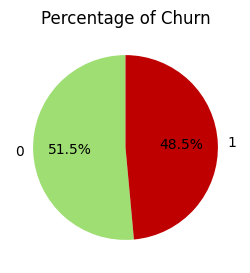

In [ ]:
churn_counts = X2['is_churn'].value_counts()

# Plotting Pie Chart
plt.figure(figsize=(3, 3))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#9EDE73', '#BE0000'])
plt.title('Percentage of Churn')
plt.show()

##### Pemodelan

###### **Gradient Boosting Classifier**

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# # Membuat model
# gbc = GradientBoostingClassifier()
# gbc.fit(X_train,y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", gbc.score(X_train,y_train))
print("Testing Score :", gbc.score(X,y))

Training Score : 0.8792548097849743
Testing Score : 0.8810258918472779


In [ ]:
# Menampilkan classification report
y_pred_gbc = gbc.predict(X)
print(classification_report(y,y_pred_gbc))
# # Prediksi churn untuk bulan kedepan
# prediksi_bulan_depan = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     16834
           1       0.84      0.93      0.88     15879

    accuracy                           0.88     32713
   macro avg       0.88      0.88      0.88     32713
weighted avg       0.89      0.88      0.88     32713



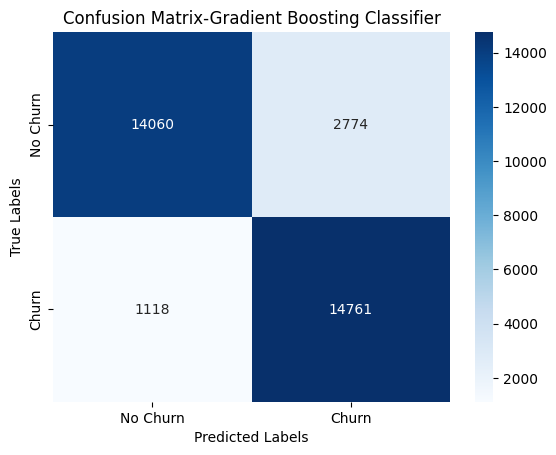

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_gbc)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'Blues');

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix-Gradient Boosting Classifier');
ax.xaxis.set_ticklabels(['No Churn', 'Churn']);
ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

In [ ]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(3,3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

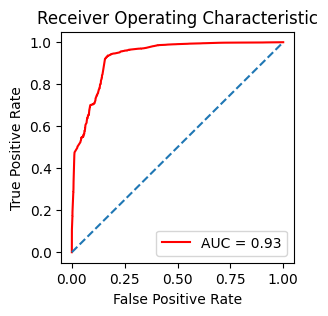

In [ ]:
y_proba_gbc= gbc.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_gbc[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **XGBoost**

In [ ]:
# import xgboost as xgb
# # Membuat model
# xgb = xgb.XGBClassifier()
# xgb.fit(X_train,y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", xgb.score(X_train,y_train))
print("Testing Score :", xgb.score(X,y))

Training Score : 0.9401062070166275
Testing Score : 0.84923424938098


In [ ]:
# Menampilkan classification report
y_pred_xgb = xgb.predict(X)
print(classification_report(y,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     16834
           1       0.84      0.86      0.85     15879

    accuracy                           0.85     32713
   macro avg       0.85      0.85      0.85     32713
weighted avg       0.85      0.85      0.85     32713



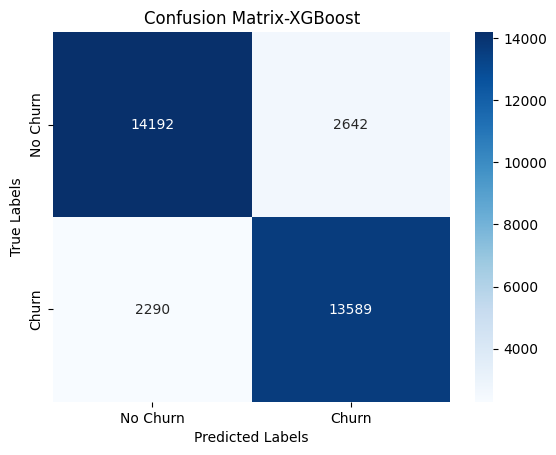

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_xgb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'Blues');

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix-XGBoost');
ax.xaxis.set_ticklabels(['No Churn', 'Churn']);
ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

In [ ]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(3,3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

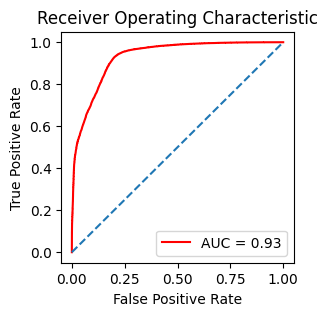

In [ ]:
y_proba_xgb= xgb.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_xgb[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### AdaBoostClassifier

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# # Inisialisasi model AdaBoost
# adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
# adaboost.fit(X_train, y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", adaboost.score(X_train, y_train))
print("Testing Score :", adaboost.score(X,y))

Training Score : 0.8631496474275268
Testing Score : 0.8667807905114174


In [ ]:
# Menampilkan classification report
y_pred_adaboost = adaboost.predict(X)
print(classification_report(y, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.91      0.83      0.86     16834
           1       0.83      0.91      0.87     15879

    accuracy                           0.87     32713
   macro avg       0.87      0.87      0.87     32713
weighted avg       0.87      0.87      0.87     32713



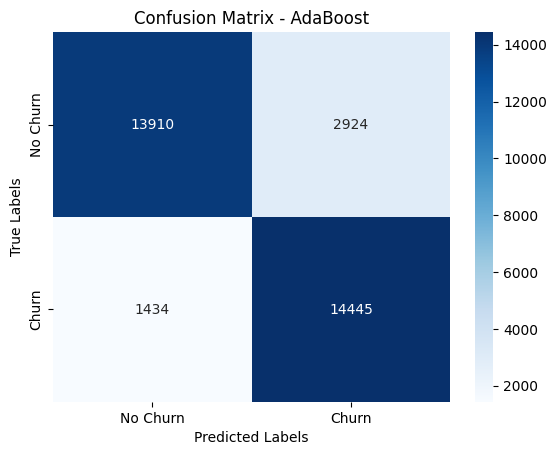

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_adaboost)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - AdaBoost')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

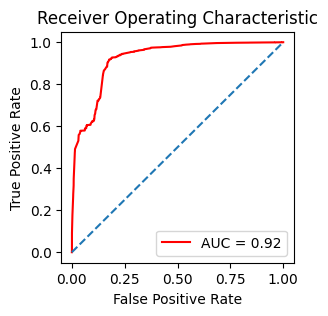

In [ ]:
y_proba_adaBoost= adaboost.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_adaBoost[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **Neural Network**

In [ ]:
# from sklearn.neural_network import MLPClassifier

# # Inisialisasi model Neural Network
# nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
# nn_model.fit(X_train, y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", nn_model.score(X_train, y_train))
print("Testing Score :", nn_model.score(X,y))

Training Score : 0.8994950813963611
Testing Score : 0.8352336991410143


In [ ]:
# Menampilkan classification report
y_pred_nn = nn_model.predict(X)
print(classification_report(y, y_pred_nn))



              precision    recall  f1-score   support

           0       0.83      0.86      0.84     16834
           1       0.85      0.81      0.83     15879

    accuracy                           0.84     32713
   macro avg       0.84      0.83      0.83     32713
weighted avg       0.84      0.84      0.84     32713



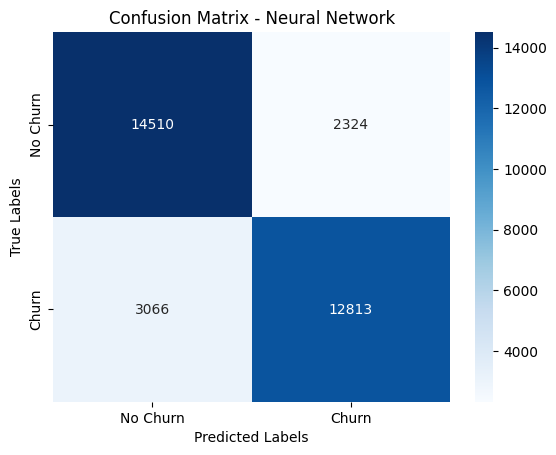

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_nn)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - Neural Network')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

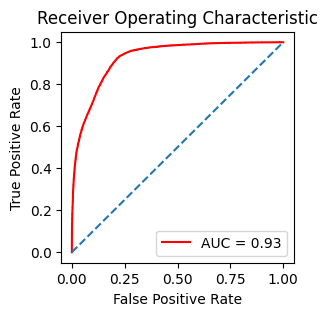

In [ ]:
y_proba_nn= nn_model.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_nn[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **lightGBM**

In [ ]:
# import lightgbm as lgb

# # Inisialisasi model LightGBM
# lgb = lgb.LGBMClassifier()
# lgb.fit(X_train, y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", lgb.score(X_train, y_train))
print("Testing Score :", lgb.score(X,y))

Training Score : 0.9069382780534517
Testing Score : 0.8638461773606823


In [ ]:
# Menampilkan classification report
y_pred_lgb = lgb.predict(X)
print(classification_report(y, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86     16834
           1       0.84      0.88      0.86     15879

    accuracy                           0.86     32713
   macro avg       0.86      0.86      0.86     32713
weighted avg       0.86      0.86      0.86     32713



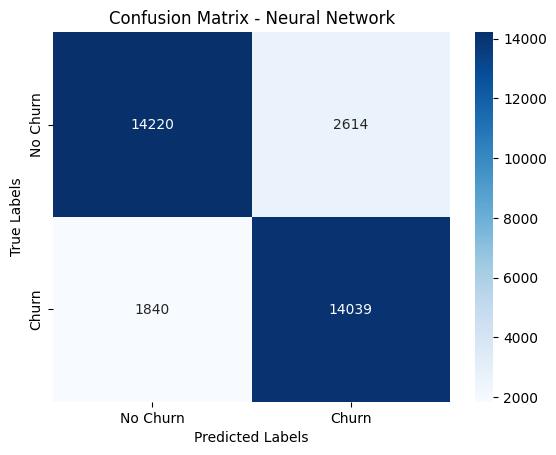

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_lgb)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - Neural Network')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

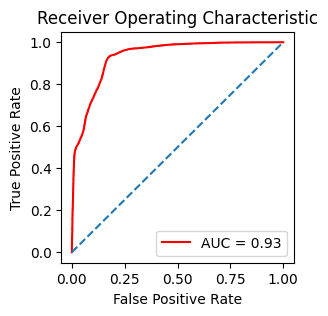

In [ ]:
y_proba_lgb= lgb.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_lgb[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **CatBoostClassifier**

In [ ]:
!pip install catboost

In [ ]:
# from catboost import CatBoostClassifier
# # Inisialisasi model CatBoost
# catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42)
# catboost_model.fit(X_train, y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", catboost_model.score(X_train, y_train))
print("Testing Score :", catboost_model.score(X,y))

Training Score : 0.8825628971881258
Testing Score : 0.8791306208540947


In [ ]:
# Menampilkan classification report
y_pred_catboost = catboost_model.predict(X)
print(classification_report(y, y_pred_catboost))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     16834
           1       0.84      0.92      0.88     15879

    accuracy                           0.88     32713
   macro avg       0.88      0.88      0.88     32713
weighted avg       0.88      0.88      0.88     32713



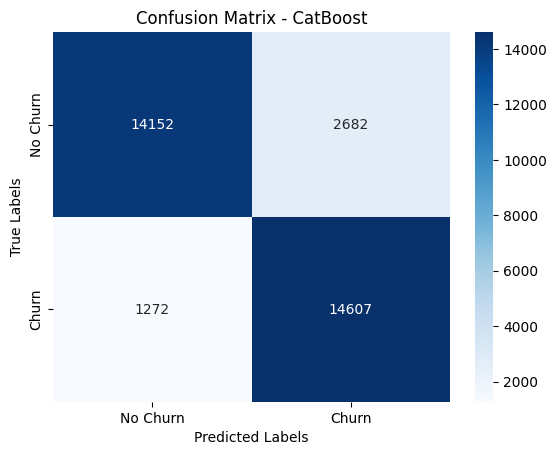

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_catboost)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - CatBoost')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

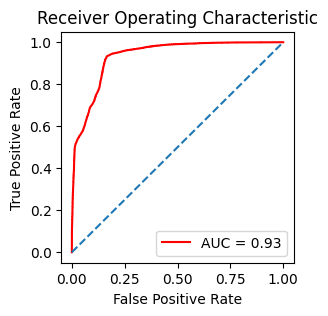

In [ ]:
y_proba_catboost= catboost_model.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_catboost[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

#### Data Ujian 2

```
# 1 Desember 2021 - 31 Mei 2022 (1 Juni 2022 - 30 Juni 2022)
```



In [ ]:
# Membuat function

def timing_frame(start_test, duration_test, duration_train):

  end_test = start_test + dt.timedelta(days = duration_test)

  start_train = start_test - dt.timedelta(days = duration_train - 1)
  end_train = start_test - dt.timedelta(days = 1)

  return start_train, end_train, start_test, end_test

In [ ]:
start_train, end_train, start_test, end_test = timing_frame(dt.datetime(2022, 6, 1, tzinfo = dt.timezone.utc), 29, 183)
print(start_train)
print(end_train)
print(start_test)
print(end_test)

2021-12-01 00:00:00+00:00
2022-05-31 00:00:00+00:00
2022-06-01 00:00:00+00:00
2022-06-30 00:00:00+00:00


In [ ]:
def prepare_data(df):

  user_order = df.groupby('customer_id').agg({ 'booking_id': 'nunique',
                                                'created_at': 'max',
                                                'total_amount': 'sum',
                                                'shipment_fee': 'sum',
                                                'shipment_limit': 'max',
                                                'promo_amount': 'sum',
                                                'payment_method_Credit Card': 'sum',
                                                'payment_method_Debit Card': 'sum',
                                                'payment_method_Gopay': 'sum',
                                                'payment_method_LinkAja': 'sum',
                                                'payment_method_OVO': 'sum' })

  user_order.rename(columns={'booking_id': 'Frequency', 'total_amount': 'Monetary'}, inplace=True)

  # Merge customer information into the user_order DataFrame
  user_order = pd.merge(user_order, customer, on='customer_id', how='left')
  user_order["recency"] = (start_test - user_order["created_at"]).dt.days

  # Convert first_join_date_x to datetime and localize to UTC
  user_order["first_join_date"] = pd.to_datetime(user_order["first_join_date"]).dt.tz_localize('UTC')

  # Calculate Duration directly without localizing start_test
  user_order["Duration"] = (start_test - user_order["first_join_date"]).dt.days

  # # user_order = user_order.reset_index()

  return user_order

In [ ]:
filter_x = transactions[transactions["created_at"].between(start_train, end_train)]
filter_y = transactions[transactions["created_at"].between(start_test, end_test)]

##### **Churn Prediction**

In [ ]:
X1 = prepare_data(filter_x)
y1 = prepare_data(filter_y)

In [ ]:
# Merge customer information into the rfm DataFrame
X1 = X1.merge(y1, on='customer_id', how='left')

In [ ]:
X1["is_churn"] = X1['Frequency_y'].isna().astype("int")
X1

,customer_id,Frequency_x,created_at_x,Monetary_x,shipment_fee_x,shipment_limit_x,promo_amount_x,payment_method_Credit Card_x,payment_method_Debit Card_x,payment_method_Gopay_x,...,payment_method_Debit Card_y,payment_method_Gopay_y,payment_method_LinkAja_y,payment_method_OVO_y,gender_y,device_type_y,first_join_date_y,recency_y,Duration_y,is_churn
0,3,7,2022-05-29 15:12:46.844494+00:00,2943317,65000,4,31792,5,1,0,...,0.0,0.0,1.0,0.0,1.0,1.0,2018-08-25 00:00:00+00:00,-26.0,1376.0,0
1,8,3,2022-05-15 22:46:22.656991+00:00,2305086,20000,4,0,3,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
2,9,3,2022-05-28 08:44:32.421034+00:00,906635,15000,4,0,1,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
3,11,1,2022-03-07 14:29:13.759159+00:00,197533,15000,1,9492,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
4,15,1,2022-01-05 06:07:58.105040+00:00,73320,10000,4,3880,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31961,99988,5,2022-05-25 06:27:50.735285+00:00,2591045,55000,5,20167,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
31962,99989,2,2022-04-03 05:00:54.024729+00:00,1127415,20000,5,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
31963,99992,3,2022-05-25 09:32:49.873510+00:00,482880,20000,3,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
31964,99995,15,2022-05-30 01:59:17.810263+00:00,6375879,120000,5,19747,11,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,2020-08-16 00:00:00+00:00,-23.0,654.0,0


In [ ]:
X1

,customer_id,Frequency_x,created_at_x,Monetary_x,shipment_fee_x,shipment_limit_x,promo_amount_x,payment_method_Credit Card_x,payment_method_Debit Card_x,payment_method_Gopay_x,...,payment_method_Debit Card_y,payment_method_Gopay_y,payment_method_LinkAja_y,payment_method_OVO_y,gender_y,device_type_y,first_join_date_y,recency_y,Duration_y,is_churn
0,3,7,2022-05-29 15:12:46.844494+00:00,2943317,65000,4,31792,5,1,0,...,0.0,0.0,1.0,0.0,1.0,1.0,2018-08-25 00:00:00+00:00,-26.0,1376.0,0
1,8,3,2022-05-15 22:46:22.656991+00:00,2305086,20000,4,0,3,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
2,9,3,2022-05-28 08:44:32.421034+00:00,906635,15000,4,0,1,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
3,11,1,2022-03-07 14:29:13.759159+00:00,197533,15000,1,9492,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
4,15,1,2022-01-05 06:07:58.105040+00:00,73320,10000,4,3880,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31961,99988,5,2022-05-25 06:27:50.735285+00:00,2591045,55000,5,20167,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
31962,99989,2,2022-04-03 05:00:54.024729+00:00,1127415,20000,5,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
31963,99992,3,2022-05-25 09:32:49.873510+00:00,482880,20000,3,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
31964,99995,15,2022-05-30 01:59:17.810263+00:00,6375879,120000,5,19747,11,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,2020-08-16 00:00:00+00:00,-23.0,654.0,0


In [ ]:
# Mengambil kolom yang mengandung "_x"
X2 = X1.filter(like="_x")

# Tambahkan kolom "is_churn" ke dalam DataFrame yang sudah difilter
Data = X2.join(X1['is_churn'])

# Mengganti nama kolom dengan menghapus "_x"
Data.columns = Data.columns.str.replace("_x", "")
# Membuang variabel yang tidak dipakai

X3 = ['created_at', 'first_join_date']
# Menghapus kolom-kolom tertentu dari DataFrame
X2 = Data.drop(columns=X3)

In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31966 entries, 0 to 31965
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Frequency                   31966 non-null  int64
 1   Monetary                    31966 non-null  int64
 2   shipment_fee                31966 non-null  int64
 3   shipment_limit              31966 non-null  int64
 4   promo_amount                31966 non-null  int64
 5   payment_method_Credit Card  31966 non-null  uint8
 6   payment_method_Debit Card   31966 non-null  uint8
 7   payment_method_Gopay        31966 non-null  uint8
 8   payment_method_LinkAja      31966 non-null  uint8
 9   payment_method_OVO          31966 non-null  uint8
 10  gender                      31966 non-null  int64
 11  device_type                 31966 non-null  int64
 12  recency                     31966 non-null  int64
 13  Duration                    31966 non-null  int64
 14  is_chu

##### Processing Data

In [ ]:
X = X2.drop(['is_churn'], axis = 1)
y = X2['is_churn']

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [ ]:
numerik = ['Frequency',	'Monetary',	'shipment_fee',	'shipment_limit',	'promo_amount','recency','Duration']
# Feature Scaling menggunakan MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# scaling = MinMaxScaler()
# X_train[numerik] = scaling.fit_transform(X_train[numerik])
X[numerik] = scaler.transform(X[numerik])

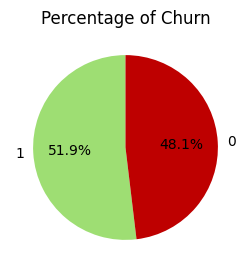

In [ ]:
churn_counts = X2['is_churn'].value_counts()

# Plotting Pie Chart
plt.figure(figsize=(3, 3))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#9EDE73', '#BE0000'])
plt.title('Percentage of Churn')
plt.show()

##### Pemodelan

###### **Logistic Regression**

In [ ]:
# lr=LogisticRegression()
# lr.fit(X_train,y_train)

In [ ]:
#Prediction of the test variable
lr_y_preds=lr.predict(X)

In [ ]:
#Training score
print("Training Score :", lr.score(X_train,y_train))
print("Testing Score :", lr.score(X,y))

Training Score : 0.7951597457995996
Testing Score : 0.8763686416817869


In [ ]:
print(classification_report(y,lr_y_preds))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87     15375
           1       0.85      0.92      0.89     16591

    accuracy                           0.88     31966
   macro avg       0.88      0.87      0.88     31966
weighted avg       0.88      0.88      0.88     31966



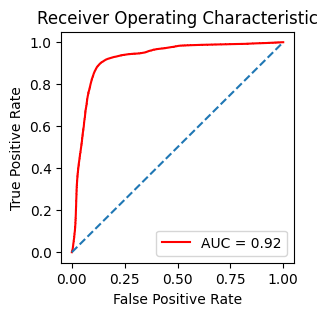

In [ ]:
#ROC Curve
y_proba_log=lr.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_log[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **Gradient Boosting Classifier**

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# # Membuat model
# gbc = GradientBoostingClassifier()
# gbc.fit(X_train,y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", gbc.score(X_train,y_train))
print("Testing Score :", gbc.score(X,y))

Training Score : 0.8792548097849743
Testing Score : 0.9237314646812238


In [ ]:
# Menampilkan classification report
y_pred_gbc = gbc.predict(X)
print(classification_report(y,y_pred_gbc))
# # Prediksi churn untuk bulan kedepan
# prediksi_bulan_depan = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     15375
           1       0.93      0.93      0.93     16591

    accuracy                           0.92     31966
   macro avg       0.92      0.92      0.92     31966
weighted avg       0.92      0.92      0.92     31966



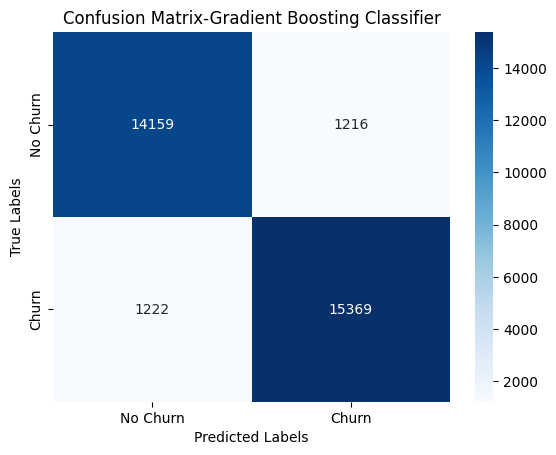

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_gbc)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'Blues');

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix-Gradient Boosting Classifier');
ax.xaxis.set_ticklabels(['No Churn', 'Churn']);
ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

In [ ]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(3,3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

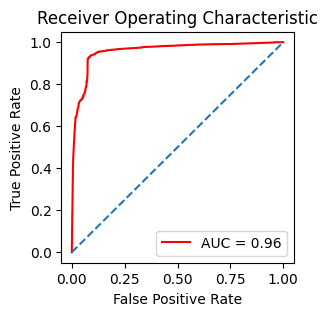

In [ ]:
y_proba_gbc= gbc.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_gbc[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

In [ ]:
# # Get feature importances
# importances = gbc.feature_importances_

# # Calculate total importance
# total_importance = sum(importances)

# # Print percentage feature importances
# for feature, importance in zip(X_train.columns, importances):
#     percentage_importance = (importance / total_importance) * 100
#     print(f"{feature}: {percentage_importance:.2f}%")
# # Calculate percentage feature importances
# percentage_importances = [(importance / total_importance) * 100 for importance in importances]

# # Create a sorted list of feature names and percentage importances
# sorted_features = [feature for _, feature in sorted(zip(percentage_importances, X_train.columns))]
# sorted_importances = sorted(percentage_importances)

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(sorted_features)), sorted_importances, align='center')
# plt.yticks(range(len(sorted_features)), sorted_features)
# plt.xlabel('Percentage Importance')
# plt.title('Feature Importances')
# plt.show()

###### **XGBoost**

In [ ]:
# import xgboost as xgb
# # Membuat model
# xgb = xgb.XGBClassifier()
# xgb.fit(X_train,y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", xgb.score(X_train,y_train))
print("Testing Score :", xgb.score(X,y))

Training Score : 0.9401062070166275
Testing Score : 0.8895701683038229


In [ ]:
# Menampilkan classification report
y_pred_xgb = xgb.predict(X)
print(classification_report(y,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     15375
           1       0.92      0.86      0.89     16591

    accuracy                           0.89     31966
   macro avg       0.89      0.89      0.89     31966
weighted avg       0.89      0.89      0.89     31966



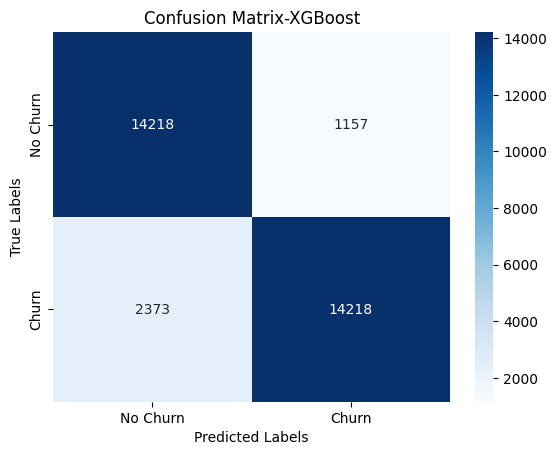

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_xgb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'Blues');

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix-XGBoost');
ax.xaxis.set_ticklabels(['No Churn', 'Churn']);
ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

In [ ]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(3,3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

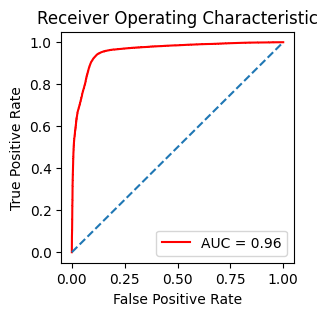

In [ ]:
y_proba_xgb= xgb.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_xgb[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### AdaBoostClassifier

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# # Inisialisasi model AdaBoost
# adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
# adaboost.fit(X_train, y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", adaboost.score(X_train, y_train))
print("Testing Score :", adaboost.score(X,y))

Training Score : 0.8631496474275268
Testing Score : 0.9144716261027341


In [ ]:
# Menampilkan classification report
y_pred_adaboost = adaboost.predict(X)
print(classification_report(y, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     15375
           1       0.91      0.92      0.92     16591

    accuracy                           0.91     31966
   macro avg       0.91      0.91      0.91     31966
weighted avg       0.91      0.91      0.91     31966



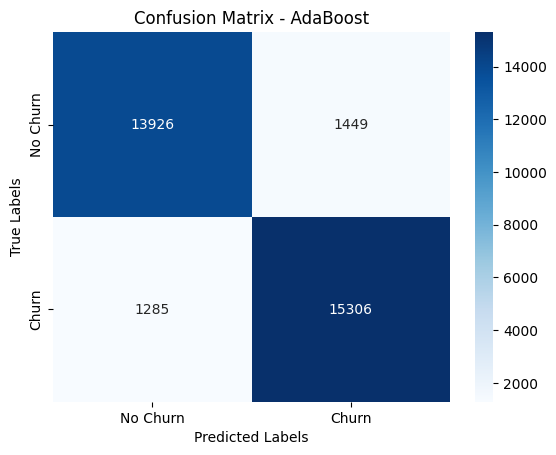

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_adaboost)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - AdaBoost')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

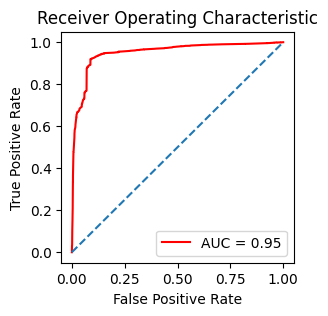

In [ ]:
y_proba_adaBoost= adaboost.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_adaBoost[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **Neural Network**

In [ ]:
# from sklearn.neural_network import MLPClassifier

# # Inisialisasi model Neural Network
# nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
# nn_model.fit(X_train, y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", nn_model.score(X_train, y_train))
print("Testing Score :", nn_model.score(X,y))

Training Score : 0.8994950813963611
Testing Score : 0.8738972658449603


In [ ]:
# Menampilkan classification report
y_pred_nn = nn_model.predict(X)
print(classification_report(y, y_pred_nn))



              precision    recall  f1-score   support

           0       0.83      0.93      0.88     15375
           1       0.92      0.83      0.87     16591

    accuracy                           0.87     31966
   macro avg       0.88      0.88      0.87     31966
weighted avg       0.88      0.87      0.87     31966



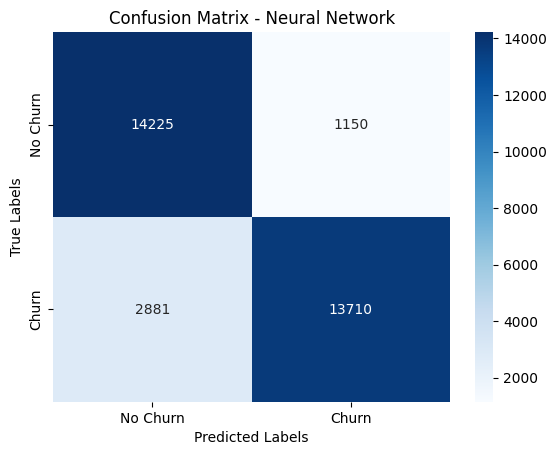

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_nn)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - Neural Network')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

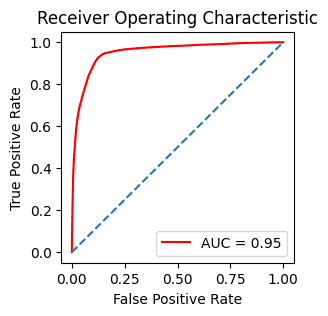

In [ ]:
y_proba_nn= nn_model.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_nn[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **lightGBM**

In [ ]:
# import lightgbm as lgb

# # Inisialisasi model LightGBM
# lgb = lgb.LGBMClassifier()
# lgb.fit(X_train, y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", lgb.score(X_train, y_train))
print("Testing Score :", lgb.score(X,y))

Training Score : 0.9069382780534517
Testing Score : 0.897516110867797


In [ ]:
# Menampilkan classification report
y_pred_lgb = lgb.predict(X)
print(classification_report(y, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     15375
           1       0.92      0.87      0.90     16591

    accuracy                           0.90     31966
   macro avg       0.90      0.90      0.90     31966
weighted avg       0.90      0.90      0.90     31966



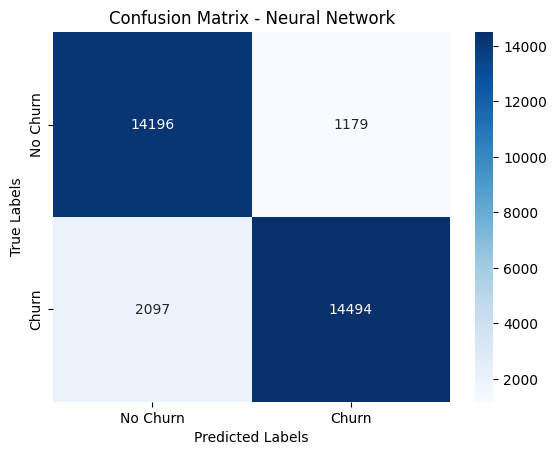

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_lgb)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - Neural Network')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

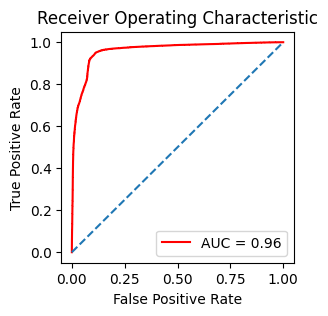

In [ ]:
y_proba_lgb= lgb.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_lgb[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **CatBoostClassifier**

In [ ]:
!pip install catboost

In [ ]:
# from catboost import CatBoostClassifier
# # Inisialisasi model CatBoost
# catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42)
# catboost_model.fit(X_train, y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", catboost_model.score(X_train, y_train))
print("Testing Score :", catboost_model.score(X,y))

Training Score : 0.8825628971881258
Testing Score : 0.918100481761872


In [ ]:
# Menampilkan classification report
y_pred_catboost = catboost_model.predict(X)
print(classification_report(y, y_pred_catboost))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     15375
           1       0.93      0.91      0.92     16591

    accuracy                           0.92     31966
   macro avg       0.92      0.92      0.92     31966
weighted avg       0.92      0.92      0.92     31966



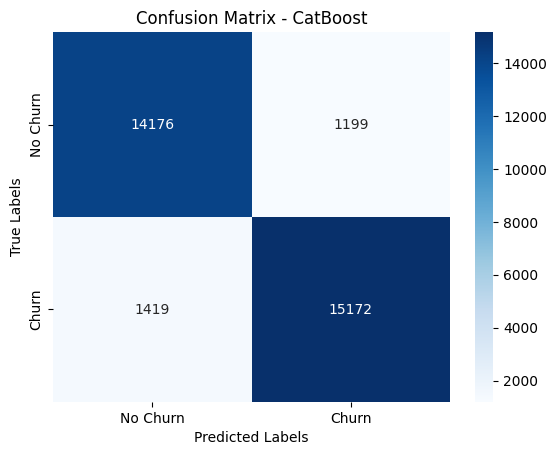

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_catboost)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - CatBoost')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

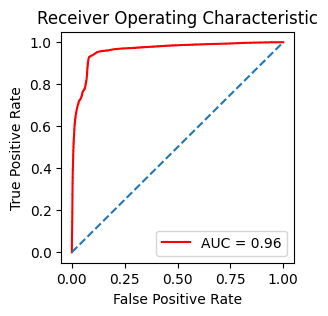

In [ ]:
y_proba_catboost= catboost_model.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_catboost[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

#### Data Ujian 3

```
# 1 Januari 2022 - 30 Juni 2022 (1 Juli 2022 - 30 Juli 2022)
```



In [ ]:
# Membuat function

def timing_frame(start_test, duration_test, duration_train):

  end_test = start_test + dt.timedelta(days = duration_test)

  start_train = start_test - dt.timedelta(days = duration_train - 1)
  end_train = start_test - dt.timedelta(days = 1)

  return start_train, end_train, start_test, end_test

In [ ]:
start_train, end_train, start_test, end_test = timing_frame(dt.datetime(2022, 7, 1, tzinfo = dt.timezone.utc), 30, 182)
print(start_train)
print(end_train)
print(start_test)
print(end_test)

2022-01-01 00:00:00+00:00
2022-06-30 00:00:00+00:00
2022-07-01 00:00:00+00:00
2022-07-31 00:00:00+00:00


In [ ]:
def prepare_data(df):

  user_order = df.groupby('customer_id').agg({ 'booking_id': 'nunique',
                                                'created_at': 'max',
                                                'total_amount': 'sum',
                                                'shipment_fee': 'sum',
                                                'shipment_limit': 'max',
                                                'promo_amount': 'sum',
                                                'payment_method_Credit Card': 'sum',
                                                'payment_method_Debit Card': 'sum',
                                                'payment_method_Gopay': 'sum',
                                                'payment_method_LinkAja': 'sum',
                                                'payment_method_OVO': 'sum' })

  user_order.rename(columns={'booking_id': 'Frequency', 'total_amount': 'Monetary'}, inplace=True)

  # Merge customer information into the user_order DataFrame
  user_order = pd.merge(user_order, customer, on='customer_id', how='left')
  user_order["recency"] = (start_test - user_order["created_at"]).dt.days

  # Convert first_join_date_x to datetime and localize to UTC
  user_order["first_join_date"] = pd.to_datetime(user_order["first_join_date"]).dt.tz_localize('UTC')

  # Calculate Duration directly without localizing start_test
  user_order["Duration"] = (start_test - user_order["first_join_date"]).dt.days

  # # user_order = user_order.reset_index()

  return user_order

In [ ]:
filter_x = transactions[transactions["created_at"].between(start_train, end_train)]
filter_y = transactions[transactions["created_at"].between(start_test, end_test)]

##### **Churn Prediction**

In [ ]:
X1 = prepare_data(filter_x)
y1 = prepare_data(filter_y)

In [ ]:
# Merge customer information into the rfm DataFrame
X1 = X1.merge(y1, on='customer_id', how='left')

In [ ]:
X1["is_churn"] = X1['Frequency_y'].isna().astype("int")
X1

,customer_id,Frequency_x,created_at_x,Monetary_x,shipment_fee_x,shipment_limit_x,promo_amount_x,payment_method_Credit Card_x,payment_method_Debit Card_x,payment_method_Gopay_x,...,payment_method_Debit Card_y,payment_method_Gopay_y,payment_method_LinkAja_y,payment_method_OVO_y,gender_y,device_type_y,first_join_date_y,recency_y,Duration_y,is_churn
0,3,7,2022-06-26 15:41:52.844494+00:00,2998828,55000,4,27717,4,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
1,8,2,2022-05-15 22:46:22.656991+00:00,1521320,10000,2,0,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
2,9,3,2022-05-28 08:44:32.421034+00:00,906635,15000,4,0,1,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
3,11,1,2022-03-07 14:29:13.759159+00:00,197533,15000,1,9492,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
4,15,1,2022-01-05 06:07:58.105040+00:00,73320,10000,4,3880,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31409,99988,4,2022-05-25 06:27:50.735285+00:00,1042683,45000,5,16335,0,4,0,...,0.0,0.0,1.0,0.0,0.0,0.0,2019-06-09 00:00:00+00:00,-4.0,1118.0,0
31410,99989,1,2022-04-03 05:00:54.024729+00:00,171997,10000,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
31411,99992,3,2022-05-25 09:32:49.873510+00:00,482880,20000,3,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
31412,99995,15,2022-06-23 02:31:49.810263+00:00,5781523,110000,5,14778,12,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,2020-08-16 00:00:00+00:00,-29.0,684.0,0


In [ ]:
X1

,customer_id,Frequency_x,created_at_x,Monetary_x,shipment_fee_x,shipment_limit_x,promo_amount_x,payment_method_Credit Card_x,payment_method_Debit Card_x,payment_method_Gopay_x,...,payment_method_Debit Card_y,payment_method_Gopay_y,payment_method_LinkAja_y,payment_method_OVO_y,gender_y,device_type_y,first_join_date_y,recency_y,Duration_y,is_churn
0,3,7,2022-06-26 15:41:52.844494+00:00,2998828,55000,4,27717,4,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
1,8,2,2022-05-15 22:46:22.656991+00:00,1521320,10000,2,0,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
2,9,3,2022-05-28 08:44:32.421034+00:00,906635,15000,4,0,1,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
3,11,1,2022-03-07 14:29:13.759159+00:00,197533,15000,1,9492,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
4,15,1,2022-01-05 06:07:58.105040+00:00,73320,10000,4,3880,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31409,99988,4,2022-05-25 06:27:50.735285+00:00,1042683,45000,5,16335,0,4,0,...,0.0,0.0,1.0,0.0,0.0,0.0,2019-06-09 00:00:00+00:00,-4.0,1118.0,0
31410,99989,1,2022-04-03 05:00:54.024729+00:00,171997,10000,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
31411,99992,3,2022-05-25 09:32:49.873510+00:00,482880,20000,3,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1
31412,99995,15,2022-06-23 02:31:49.810263+00:00,5781523,110000,5,14778,12,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,2020-08-16 00:00:00+00:00,-29.0,684.0,0


In [ ]:
# Mengambil kolom yang mengandung "_x"
X2 = X1.filter(like="_x")

# Tambahkan kolom "is_churn" ke dalam DataFrame yang sudah difilter
Data = X2.join(X1['is_churn'])

# Mengganti nama kolom dengan menghapus "_x"
Data.columns = Data.columns.str.replace("_x", "")
# Membuang variabel yang tidak dipakai

X3 = ['created_at', 'first_join_date']
# Menghapus kolom-kolom tertentu dari DataFrame
X2 = Data.drop(columns=X3)

In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31414 entries, 0 to 31413
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Frequency                   31414 non-null  int64
 1   Monetary                    31414 non-null  int64
 2   shipment_fee                31414 non-null  int64
 3   shipment_limit              31414 non-null  int64
 4   promo_amount                31414 non-null  int64
 5   payment_method_Credit Card  31414 non-null  uint8
 6   payment_method_Debit Card   31414 non-null  uint8
 7   payment_method_Gopay        31414 non-null  uint8
 8   payment_method_LinkAja      31414 non-null  uint8
 9   payment_method_OVO          31414 non-null  uint8
 10  gender                      31414 non-null  int64
 11  device_type                 31414 non-null  int64
 12  recency                     31414 non-null  int64
 13  Duration                    31414 non-null  int64
 14  is_chu

##### Processing Data

In [ ]:
X = X2.drop(['is_churn'], axis = 1)
y = X2['is_churn']

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [ ]:
numerik = ['Frequency',	'Monetary',	'shipment_fee',	'shipment_limit',	'promo_amount','recency','Duration']
# Feature Scaling menggunakan MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# scaling = MinMaxScaler()
# X_train[numerik] = scaling.fit_transform(X_train[numerik])
X[numerik] = scaler.transform(X[numerik])

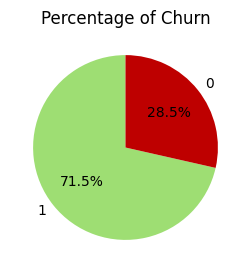

In [ ]:
churn_counts = X2['is_churn'].value_counts()

# Plotting Pie Chart
plt.figure(figsize=(3, 3))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#9EDE73', '#BE0000'])
plt.title('Percentage of Churn')
plt.show()

##### Pemodelan

###### **Gradient Boosting Classifier**

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# # Membuat model
# gbc = GradientBoostingClassifier()
# gbc.fit(X_train,y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", gbc.score(X_train,y_train))
print("Testing Score :", gbc.score(X,y))

Training Score : 0.8792548097849743
Testing Score : 0.7698478385433246


In [ ]:
# Menampilkan classification report
y_pred_gbc = gbc.predict(X)
print(classification_report(y,y_pred_gbc))
# # Prediksi churn untuk bulan kedepan
# prediksi_bulan_depan = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.56      0.97      0.71      8966
           1       0.98      0.69      0.81     22448

    accuracy                           0.77     31414
   macro avg       0.77      0.83      0.76     31414
weighted avg       0.86      0.77      0.78     31414



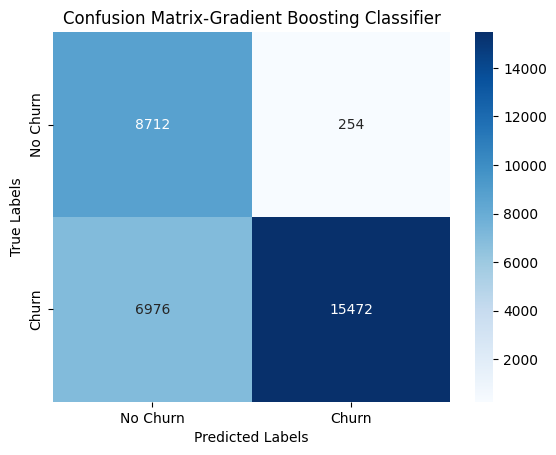

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_gbc)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'Blues');

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix-Gradient Boosting Classifier');
ax.xaxis.set_ticklabels(['No Churn', 'Churn']);
ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

In [ ]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(3,3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

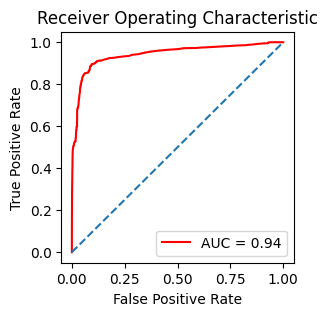

In [ ]:
y_proba_gbc= gbc.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_gbc[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **XGBoost**

In [ ]:
# import xgboost as xgb
# # Membuat model
# xgb = xgb.XGBClassifier()
# xgb.fit(X_train,y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", xgb.score(X_train,y_train))
print("Testing Score :", xgb.score(X,y))

Training Score : 0.9401062070166275
Testing Score : 0.7189151333800217


In [ ]:
# Menampilkan classification report
y_pred_xgb = xgb.predict(X)
print(classification_report(y,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.50      0.97      0.66      8966
           1       0.98      0.62      0.76     22448

    accuracy                           0.72     31414
   macro avg       0.74      0.80      0.71     31414
weighted avg       0.85      0.72      0.73     31414



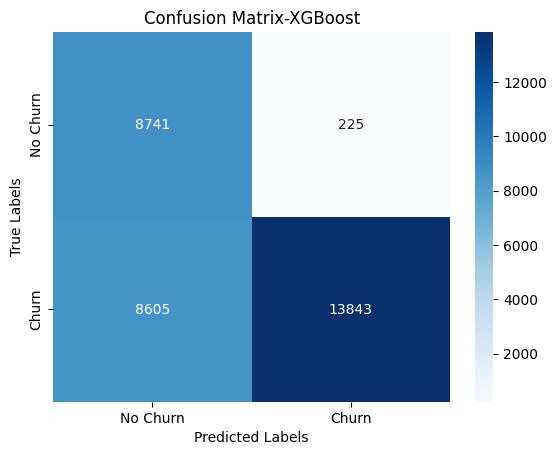

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_xgb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'Blues');

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix-XGBoost');
ax.xaxis.set_ticklabels(['No Churn', 'Churn']);
ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

In [ ]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(3,3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

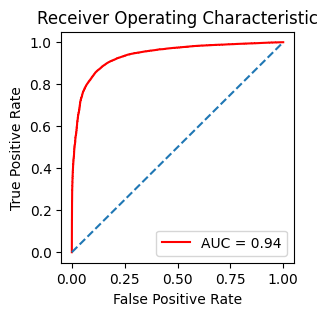

In [ ]:
y_proba_xgb= xgb.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_xgb[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### AdaBoostClassifier

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# # Inisialisasi model AdaBoost
# adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
# adaboost.fit(X_train, y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", adaboost.score(X_train, y_train))
print("Testing Score :", adaboost.score(X,y))

Training Score : 0.8631496474275268
Testing Score : 0.7800025466352581


In [ ]:
# Menampilkan classification report
y_pred_adaboost = adaboost.predict(X)
print(classification_report(y, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.57      0.98      0.72      8966
           1       0.99      0.70      0.82     22448

    accuracy                           0.78     31414
   macro avg       0.78      0.84      0.77     31414
weighted avg       0.87      0.78      0.79     31414



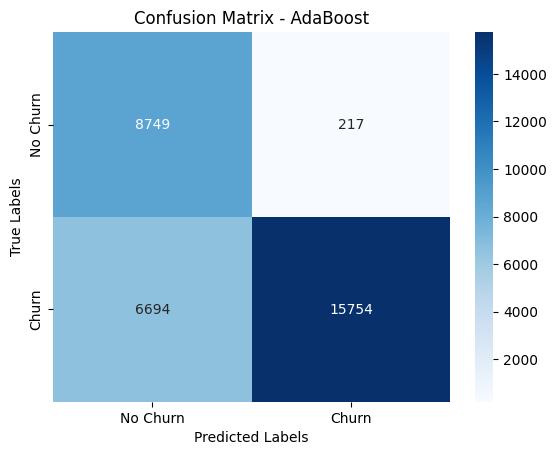

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_adaboost)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - AdaBoost')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

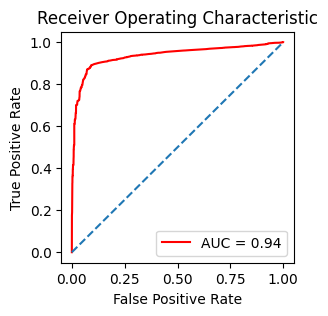

In [ ]:
y_proba_adaBoost= adaboost.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_adaBoost[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **Neural Network**

In [ ]:
# from sklearn.neural_network import MLPClassifier

# # Inisialisasi model Neural Network
# nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
# nn_model.fit(X_train, y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", nn_model.score(X_train, y_train))
print("Testing Score :", nn_model.score(X,y))

Training Score : 0.8994950813963611
Testing Score : 0.6958044184121729


In [ ]:
# Menampilkan classification report
y_pred_nn = nn_model.predict(X)
print(classification_report(y, y_pred_nn))



              precision    recall  f1-score   support

           0       0.48      0.98      0.65      8966
           1       0.99      0.58      0.73     22448

    accuracy                           0.70     31414
   macro avg       0.74      0.78      0.69     31414
weighted avg       0.84      0.70      0.71     31414



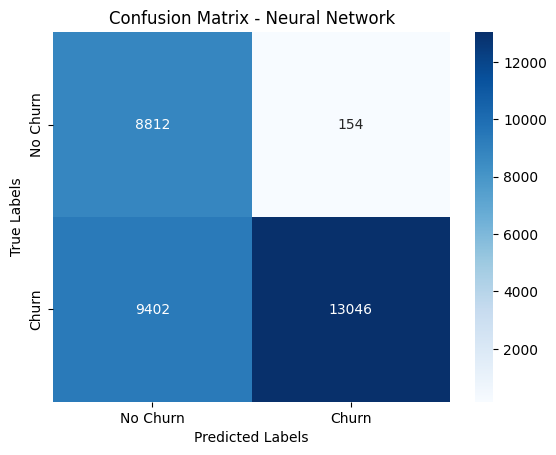

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_nn)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - Neural Network')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

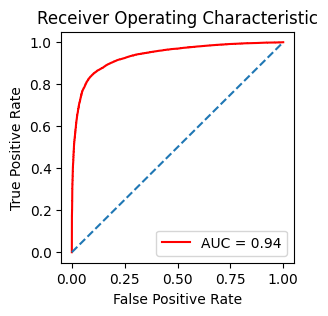

In [ ]:
y_proba_nn= nn_model.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_nn[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **lightGBM**

In [ ]:
# import lightgbm as lgb

# # Inisialisasi model LightGBM
# lgb = lgb.LGBMClassifier()
# lgb.fit(X_train, y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", lgb.score(X_train, y_train))
print("Testing Score :", lgb.score(X,y))

Training Score : 0.9069382780534517
Testing Score : 0.7354682625580952


In [ ]:
# Menampilkan classification report
y_pred_lgb = lgb.predict(X)
print(classification_report(y, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.52      0.97      0.68      8966
           1       0.98      0.64      0.78     22448

    accuracy                           0.74     31414
   macro avg       0.75      0.81      0.73     31414
weighted avg       0.85      0.74      0.75     31414



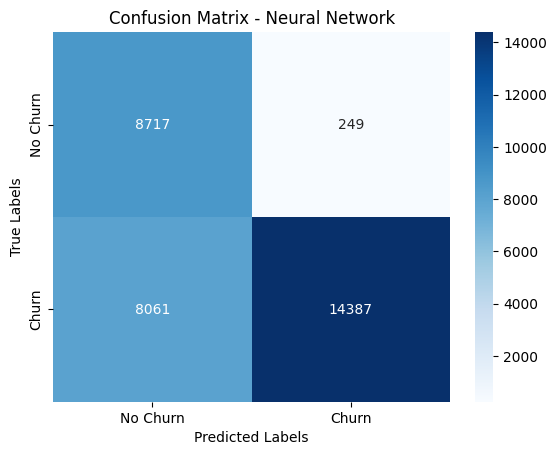

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_lgb)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - Neural Network')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

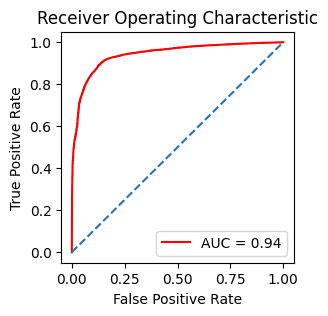

In [ ]:
y_proba_lgb= lgb.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_lgb[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

###### **CatBoostClassifier**

In [ ]:
!pip install catboost

In [ ]:
# from catboost import CatBoostClassifier
# # Inisialisasi model CatBoost
# catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42)
# catboost_model.fit(X_train, y_train)

In [ ]:
# Menampilkan training score dan testing score
print("Training Score :", catboost_model.score(X_train, y_train))
print("Testing Score :", catboost_model.score(X,y))

Training Score : 0.8825628971881258
Testing Score : 0.7578149869484943


In [ ]:
# Menampilkan classification report
y_pred_catboost = catboost_model.predict(X)
print(classification_report(y, y_pred_catboost))

              precision    recall  f1-score   support

           0       0.54      0.97      0.70      8966
           1       0.98      0.67      0.80     22448

    accuracy                           0.76     31414
   macro avg       0.76      0.82      0.75     31414
weighted avg       0.86      0.76      0.77     31414



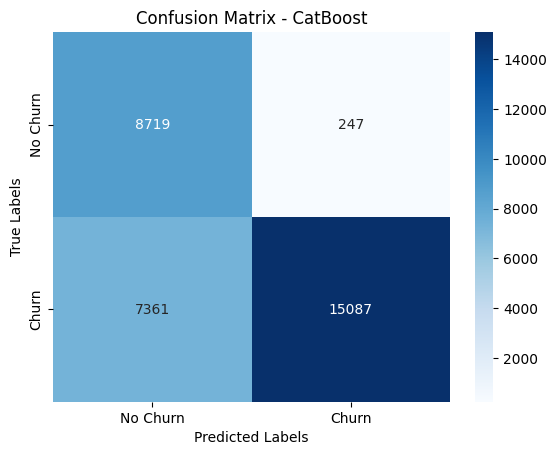

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_catboost)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - CatBoost')
ax.xaxis.set_ticklabels(['No Churn', 'Churn'])
ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
plt.show()

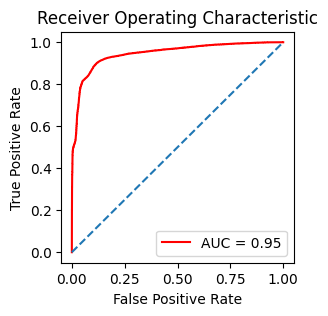

In [ ]:
y_proba_catboost= catboost_model.predict_proba(X)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y,y_proba_catboost[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

# Model Evaluation

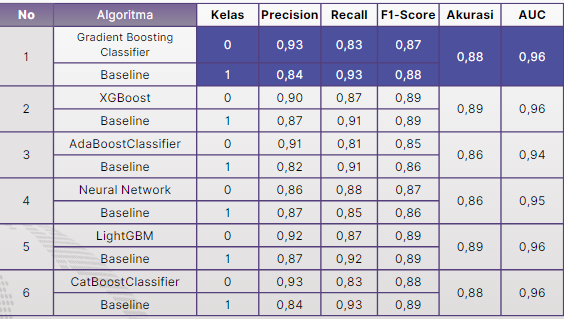

- Terlihat bahwa Pemodelan dengan AlgortimaGradient memiliki metrics evaluation yang paling stabil.
- Model terbaik yang akan kita pilih adalah model yang jika diimplementasikan akan meminimalisasi "Lost Opportunity". Dimana akan kita pilih model jika terdapat kesalahan klasifikasi akan di klasifikasikan pada False Positif dan memperkecil False Negative. Selanjutnya untuk memilih model terbaik akan dilakukan Cost Benefit Analysis.


# Feature Importance

In [ ]:
# Mendapatkan feature importances
importan = gbc.feature_importances_

In [ ]:
# Membuat DataFrame dari feature importances
df_importan = pd.DataFrame({'Feature': X_train.columns, 'Importance': importan})

In [ ]:
# Mengurutkan feature importances secara menurun
df_sorted = df_importan.sort_values(by='Importance', ascending=False)

**Percentage of Fitur Importance**

In [ ]:
# Get feature importances
importances = gbc.feature_importances_

# Calculate total importance
total_importance = sum(importances)

# Create a list of tuples with feature names and their importances
features_importance = list(zip(X_train.columns, importances))

# Sort the list by importance in descending order
sorted_features_importance = sorted(features_importance, key=lambda x: x[1], reverse=True)

# Print percentage feature importances in sorted order
for feature, importance in sorted_features_importance:
    percentage_importance = (importance / total_importance) * 100
    print(f"{feature}: {percentage_importance:.2f}%")

Frequency: 65.58%
recency: 27.95%
Duration: 6.27%
Monetary: 0.09%
shipment_fee: 0.02%
promo_amount: 0.02%
payment_method_Gopay: 0.02%
shipment_limit: 0.01%
payment_method_Debit Card: 0.01%
device_type: 0.01%
payment_method_LinkAja: 0.01%
payment_method_Credit Card: 0.00%
gender: 0.00%
payment_method_OVO: 0.00%


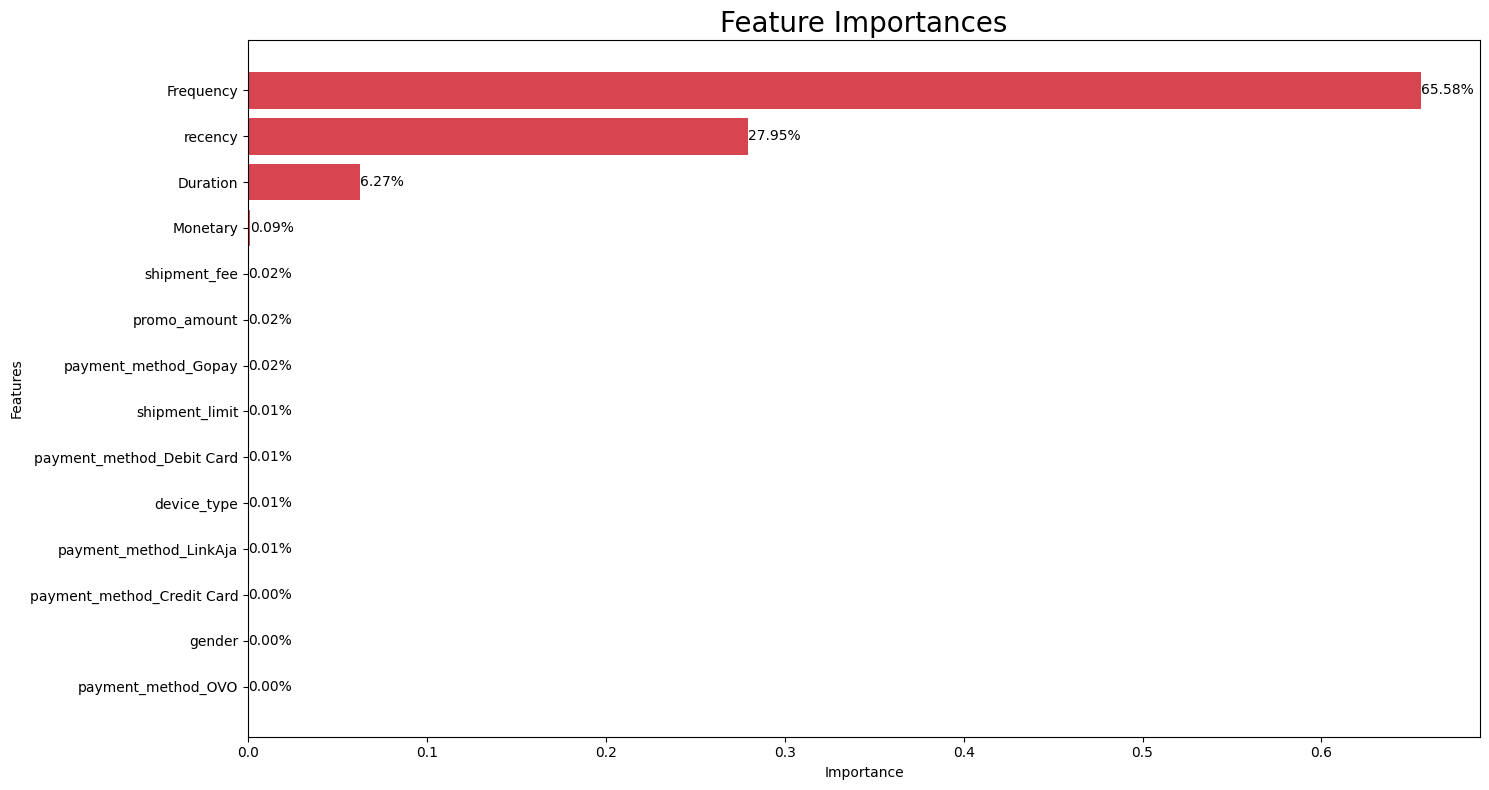

In [ ]:
# Visualizing the feature importance
df_sorted = df_sorted.sort_values(by='Importance', ascending=True)
pinkish_red = '#D64550'
plt.figure(figsize=(15,8))
bars = plt.barh(range(len(df_sorted)), df_sorted['Importance'], align='center', color=pinkish_red)
plt.yticks(range(len(df_sorted)), df_sorted['Feature'])
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Feature Importances', fontsize=20)

# Add percentage labels to the bars with custom font
for bar, (feature, importance) in zip(bars, zip(df_sorted['Feature'], df_sorted['Importance'])):
    percentage_importance = (importance / total_importance) * 100
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage_importance:.2f}%',
             va='center', ha='left', color='black', fontsize=10)

plt.tight_layout()
plt.show()




---
# Insight
---
- Frequency merupakan faktor yang paling berkontribusi dalam mempengaruhi customer churn, yaitu sebesar 65.58%.
- Recency memiliki kontribusi dalam mempengaruhi customer churn, yaitu sebesar 27.95%.
- Duration memiliki kontribusi dalam mempengaruhi customer churn, yaitu sebesar 6.27%.
- Monetary memiliki kontribusi dalam mempengaruhi customer churn, yaitu sebesar 0.09%.
- promo_amount dan shipment_fee memiliki kontribusi dalam mempengaruhi customer churn, yaitu sebesar 0.09%., yaitu sebesar 0.02%.
- Dalam pengetesan korelasi antara promo_amount dan juga RFM terlihat bahwa promo_amount berkorelasi positif dengan Frequncy dan Monetary yang artinya semakin besar promo_amount yang diberikan kepada customer kecenderungannya akan meningkatkan chance Frequency dan Monetary untuk naik
- Recency akan lebih dipengaruhi oleh Customer Experience dan juga Availability dari produk yang tersedia di ecommerce

##### Korelasi Promo Amount -> Monetary dan Frequency

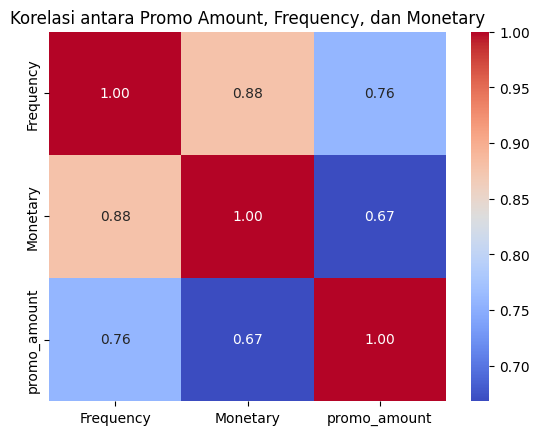

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = X2[['Frequency', 'Monetary', 'promo_amount']].corr()

# Membuat heatmap untuk visualisasi korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Promo Amount, Frequency, dan Monetary')
plt.show()



---
# Recommendation
---
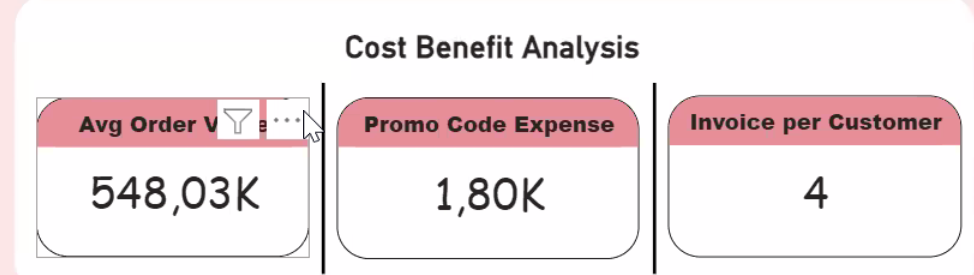



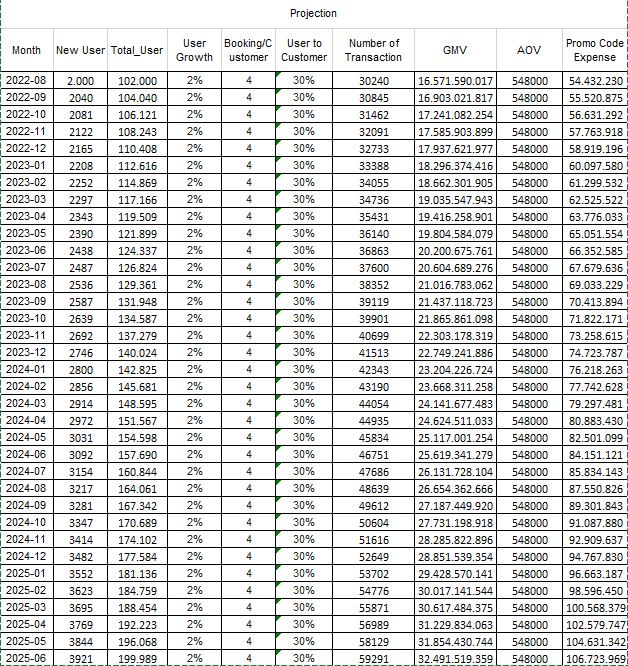

- Berdasarkan Korelasi Promo_Amount, Frequency, dan Monetary dan juga jika dilihat dari perbandingan AOV dan juga Promo Code Expense, Perusahaan lebih baik memberikan Kode Promo kepada customer yang churn maupun tidak, dikarenakan ROI (304x) dari pemberian Kode Promo sangatlah tinggi
- Untuk meningkatkan Recency atau dalam kata lain seringnya/kerutinan customer dalam melakukan pembelian di E-Commerce ini, perlu dilakukan improvement di bagian Customer Experience seperti perbaikan UI/UX dan juga meningkatkan Availability dari produk-produk fashion yang tersedia di E-Commerce sehingga kebutuhan barangnya dicari customer bisa terpenuhi.
- Selain daripada Availability dari variasi produk yang ditingkatkan, hal lain yang bisa dilakukan company adalah meningkatkan tingkat awareness terhadap E-commerce Fashion sehingga menjadi "Top of Mind" para pencari barang-barang fashion.